In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic' 

data = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/Proj_WT/DataSets/한국관광공사_관광빅데이터/서울자치구_방문자수집계_0426_0627.csv')
data.head()

data = data.rename(columns = {'baseYmd':'date_time', 'daywkDivCd':'dayofyear','daywkDivNm':'weekday','signguCode':'구별코드','signguNm':'구'})
data = data[data['date_time'] <= 20210618]

In [ ]:
# 우리가 원하는 데이터인 현지인과 외지인이 어디로 갔는지 분석해 보자.
train_현지인 = data[data['touDivNm'] == '현지인(a)']
train_외지인 = data[data['touDivNm'] == '외지인(b)']

# touDivCd 라는 변수는 현지인과 외지인을 나타내기 때문에 제외시켜 준다.
train_현지인.drop('touDivNm', axis = 1, inplace = True)
train_외지인.drop('touDivNm', axis = 1, inplace = True)

# 현지인과 외지인을 합쳐서 dataframe을 다시 구축해준다.
touNum = train_현지인['touNum'].values + train_외지인['touNum'].values
train_현지인['touNum'] = touNum
train = train_현지인.copy()

train = train.reset_index(drop= True)

train = train.rename(columns = {'touNum':'target'})

In [ ]:
train.head()

,date_time,dayofyear,weekday,구별코드,구,touDivCd,target
0,20210426,1,월요일,11110,종로구,1,436726.5
1,20210427,2,화요일,11110,종로구,1,448294.0
2,20210428,3,수요일,11110,종로구,1,462843.5
3,20210429,4,목요일,11110,종로구,1,460985.0
4,20210430,5,금요일,11110,종로구,1,472216.5


In [ ]:
train['date_time'] = train['date_time'].astype('str')
# 시간을 년, 월, 일로 나눠준다.
def date_time(df, columns = 'date_time'):
  df['year'] = df[columns].apply(lambda x:x[:4])
  df['month'] = df[columns].apply(lambda x: x[4:6])
  df['day'] = df[columns].apply(lambda x:x[6:8])
  return df

def weekday(df, columns = 'date_time'):
    df[columns]=pd.to_datetime(df[columns])
    df['weekday'] = df[columns].apply(lambda x:x.weekday())
    df['weekend'] = df['weekday']
    df['weekday'] = df['weekday'].apply(lambda x:1 if x > 4 else 0)
    df['date'] = df[columns].dt.date
    return df

train = date_time(train)
train = weekday(train)
train.head()

,date_time,dayofyear,weekday,구별코드,구,touDivCd,target,year,month,day,weekend,date
0,2021-04-26,1,0,11110,종로구,1,436726.5,2021,04,26,0,2021-04-26
1,2021-04-27,2,0,11110,종로구,1,448294.0,2021,04,27,1,2021-04-27
2,2021-04-28,3,0,11110,종로구,1,462843.5,2021,04,28,2,2021-04-28
3,2021-04-29,4,0,11110,종로구,1,460985.0,2021,04,29,3,2021-04-29
4,2021-04-30,5,0,11110,종로구,1,472216.5,2021,04,30,4,2021-04-30


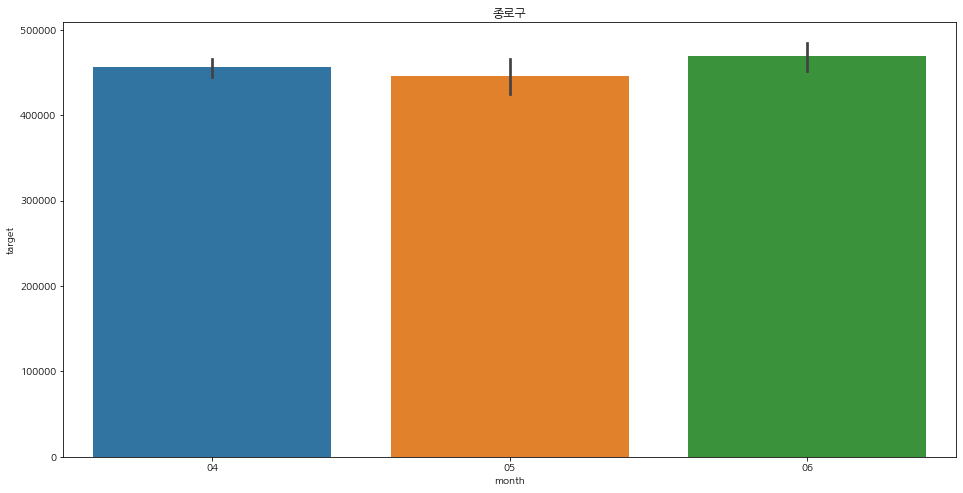

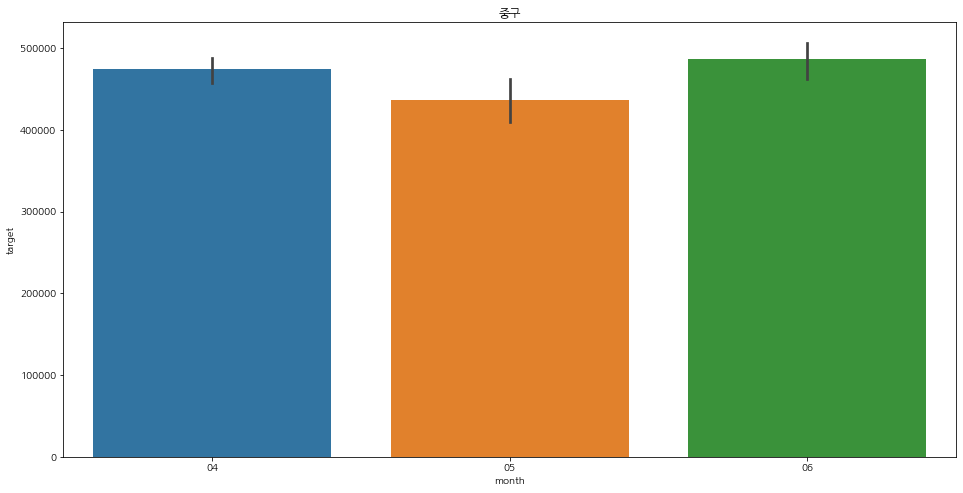

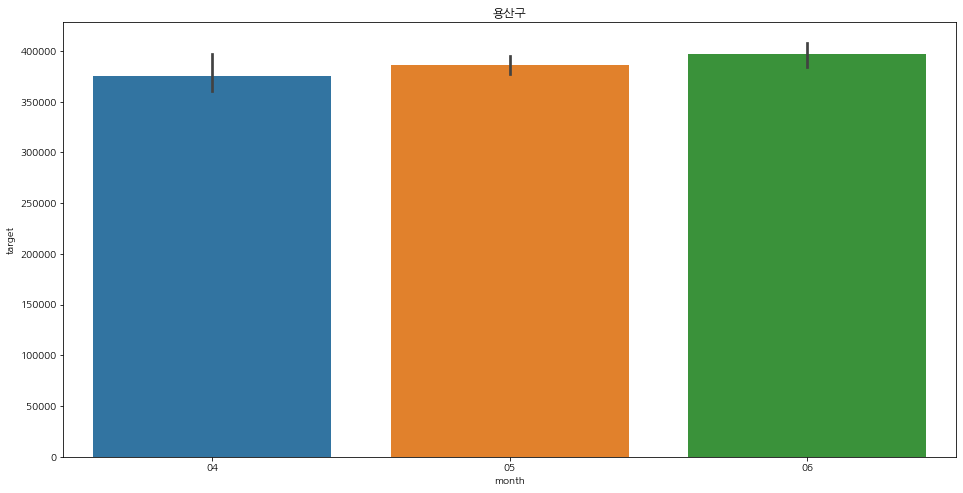

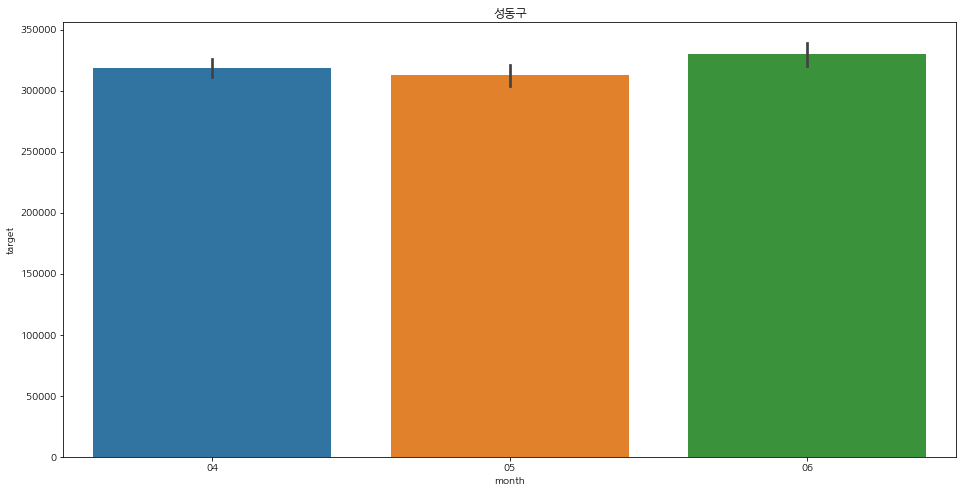

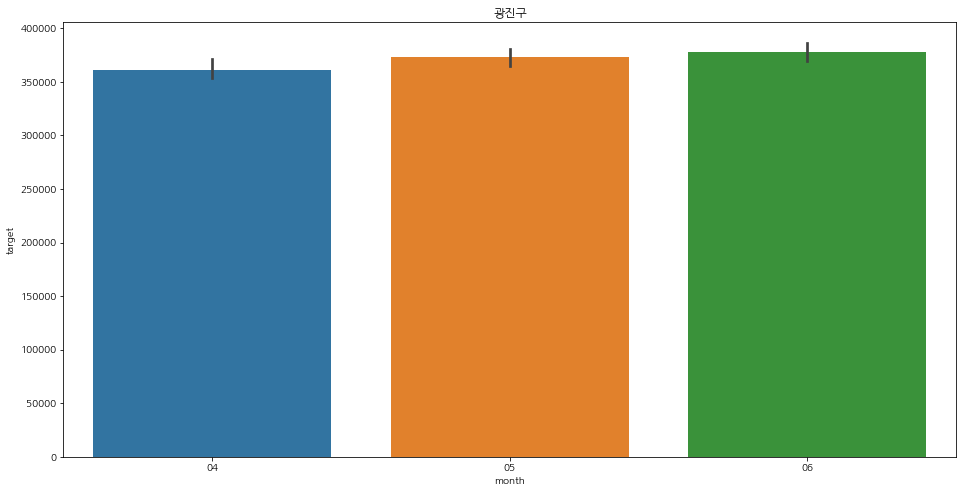

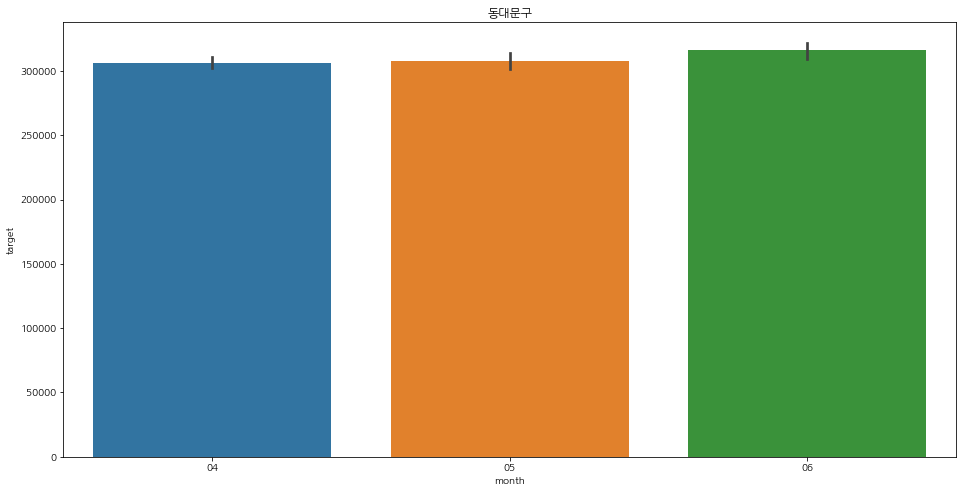

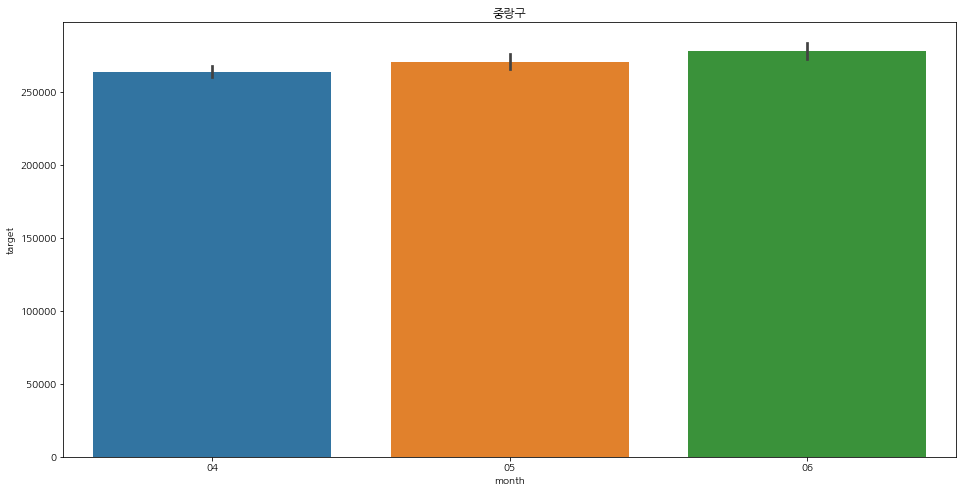

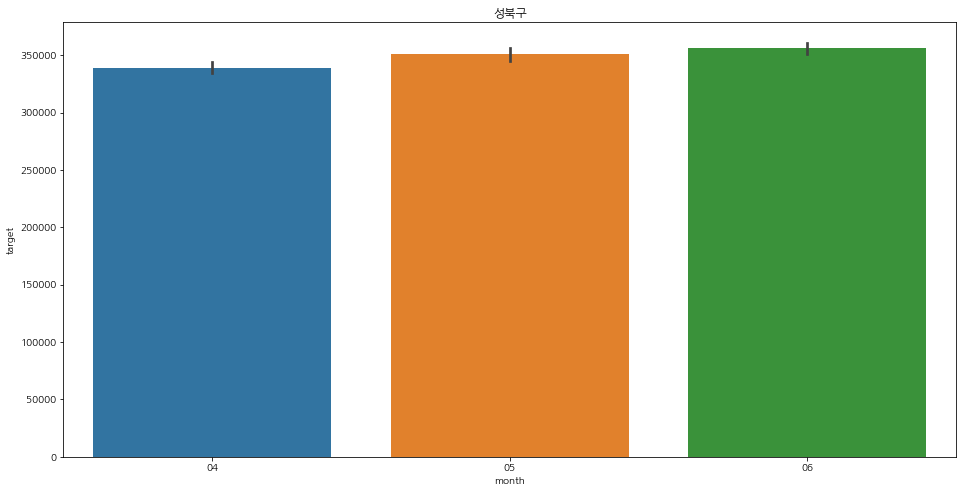

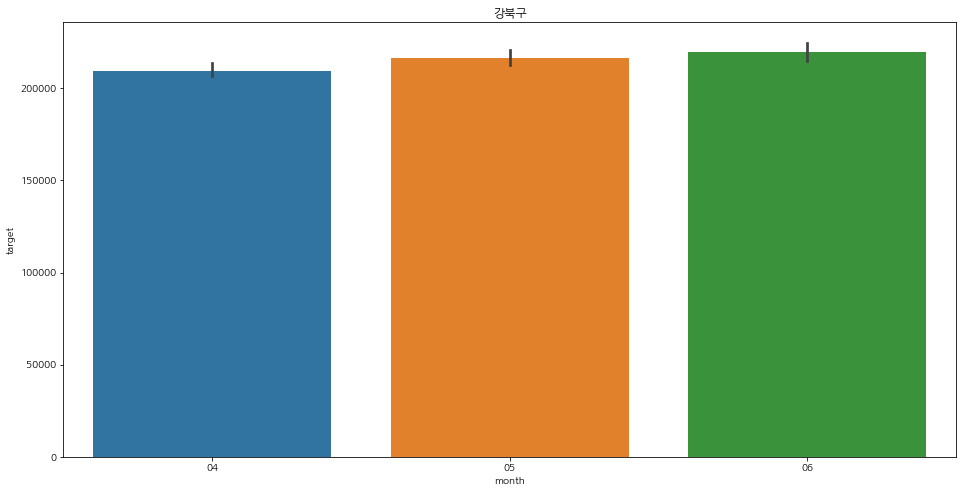

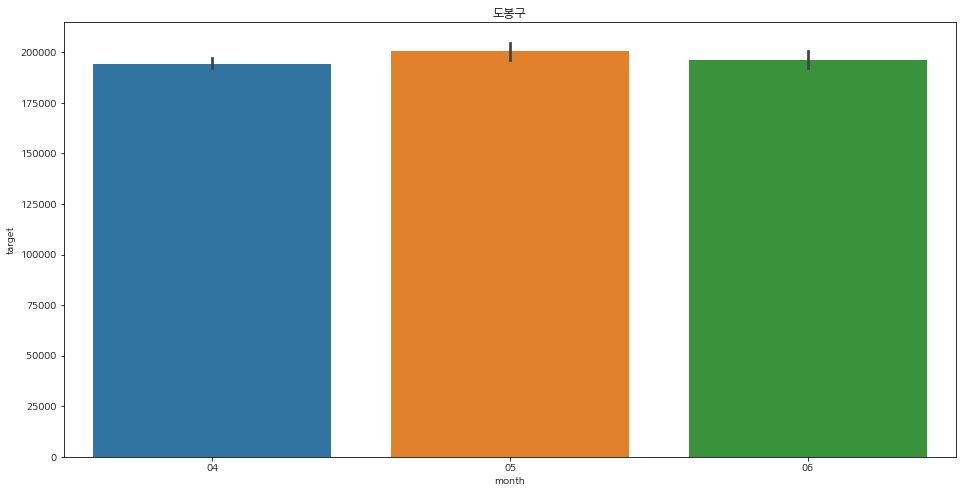

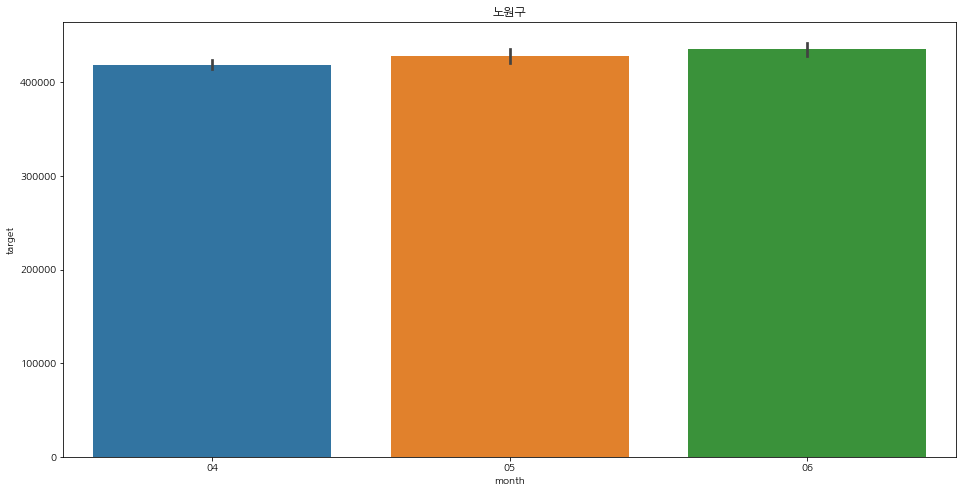

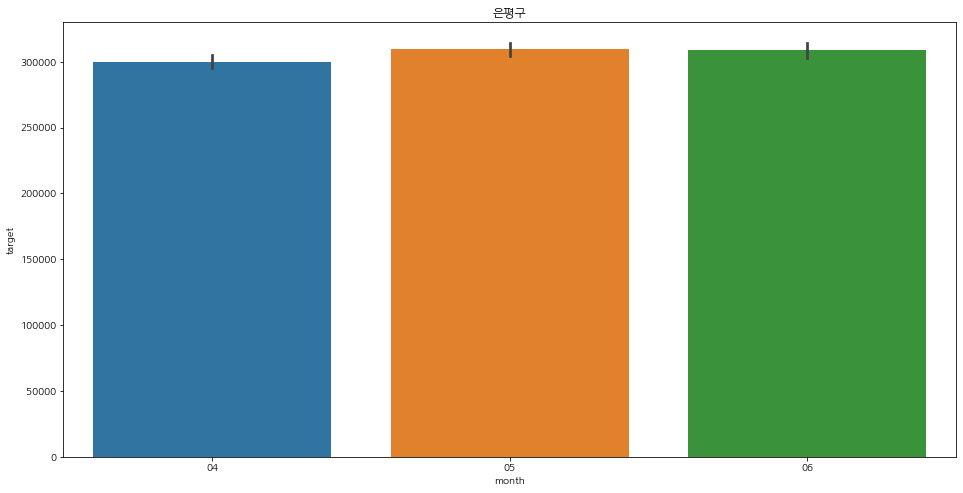

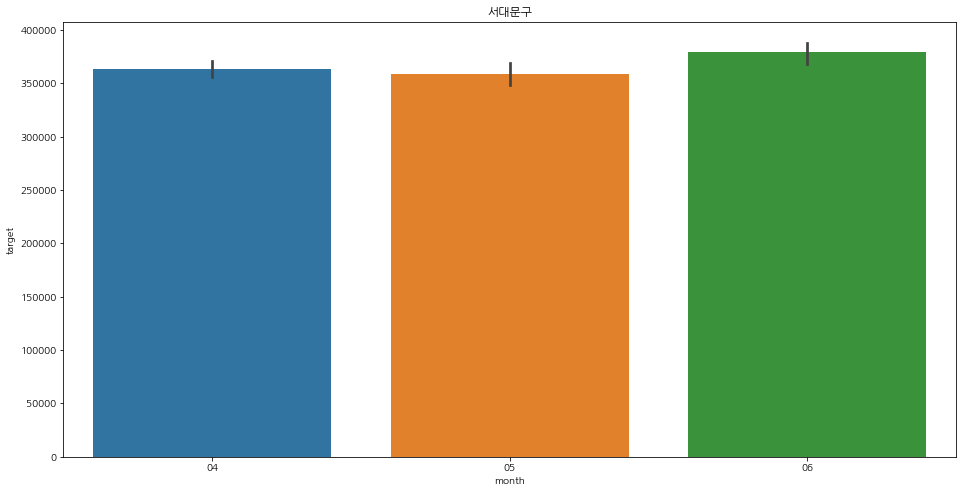

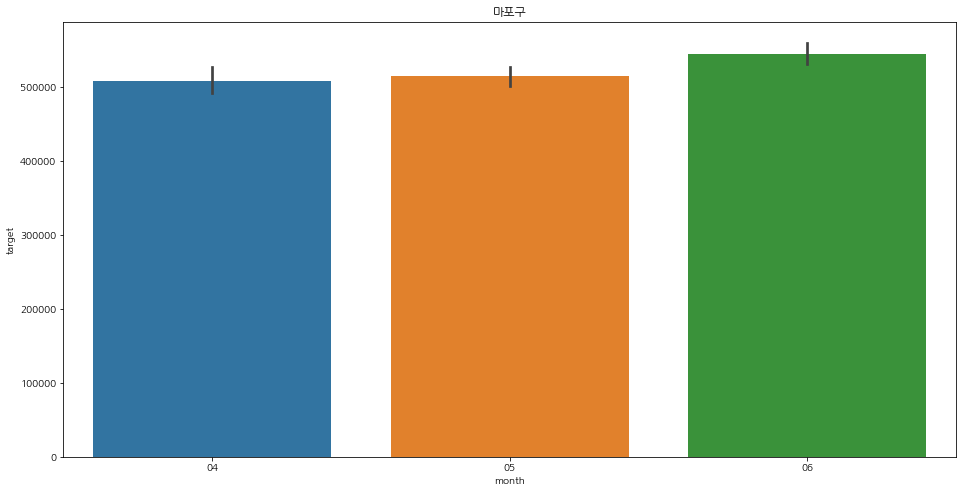

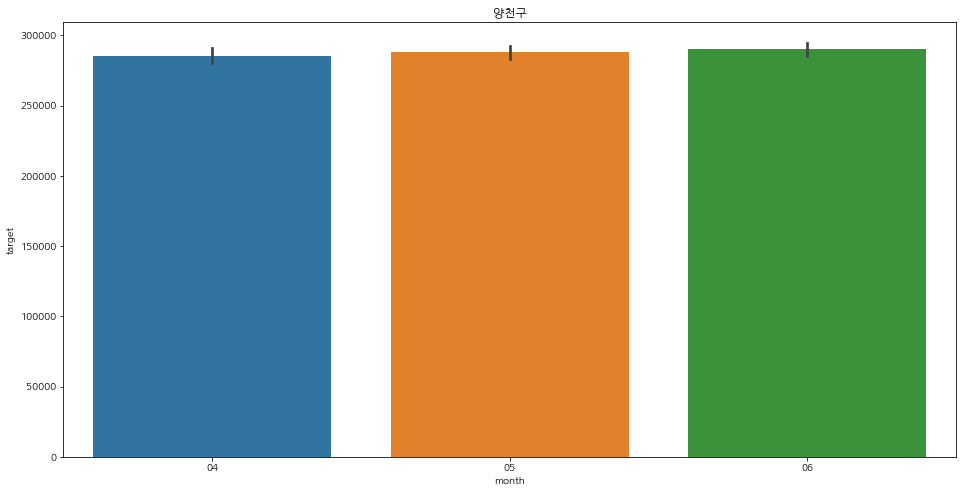

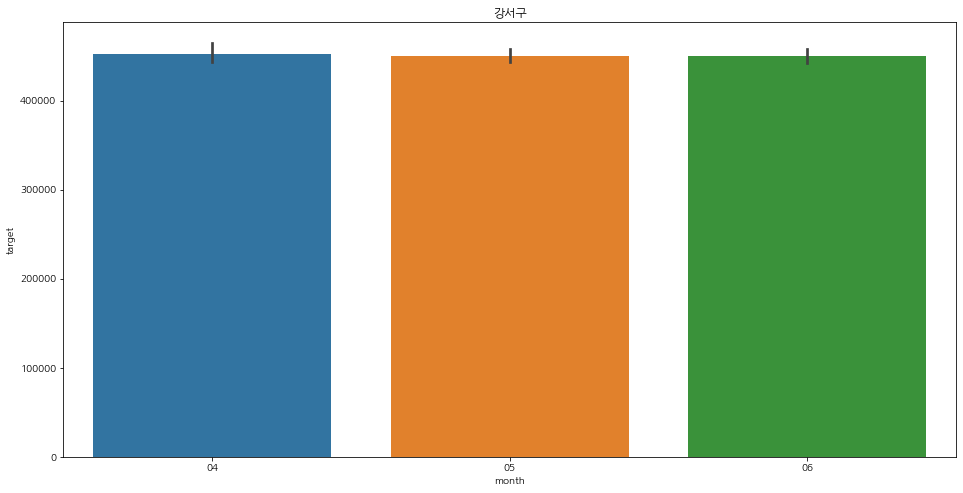

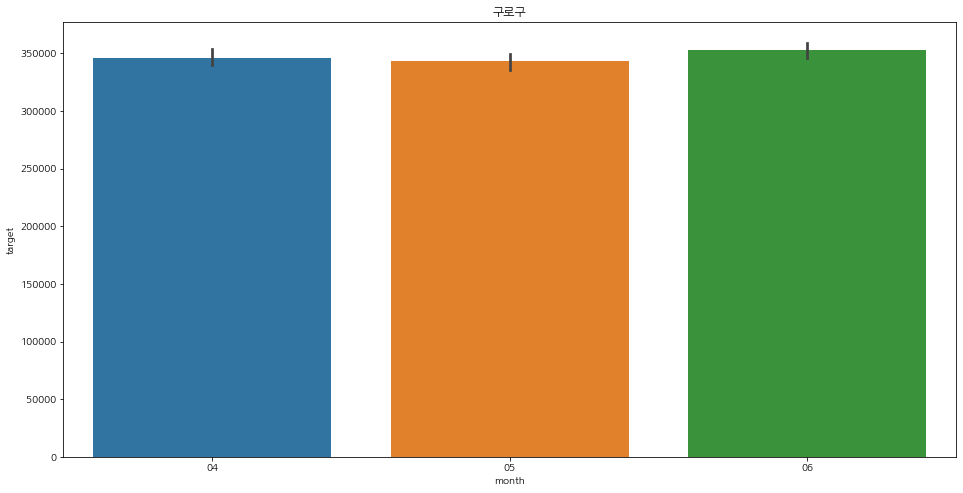

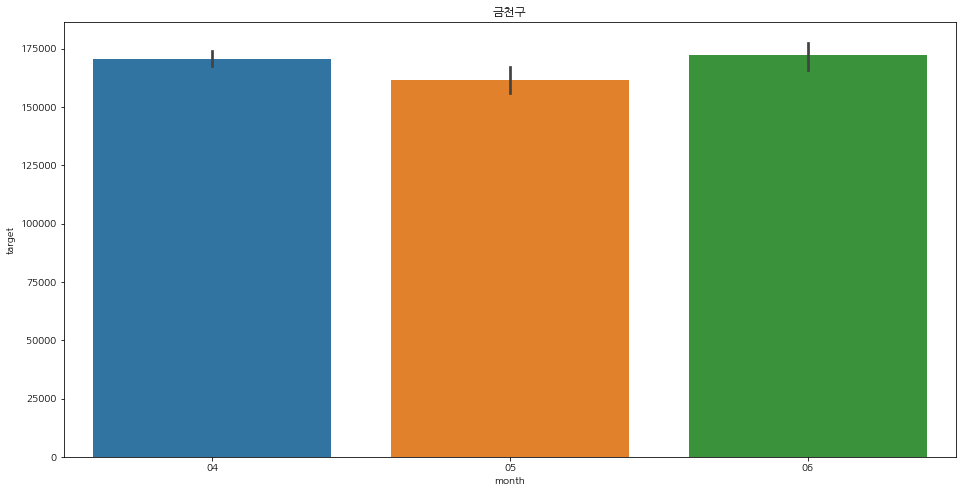

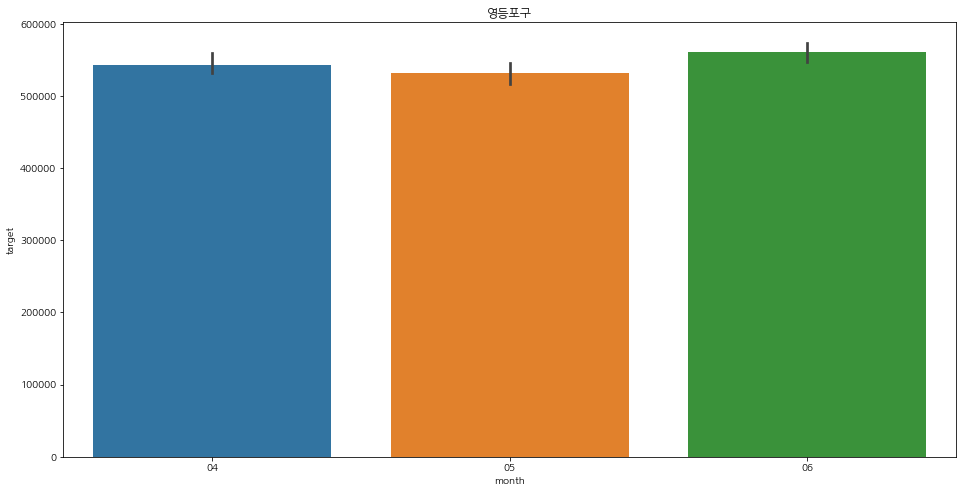

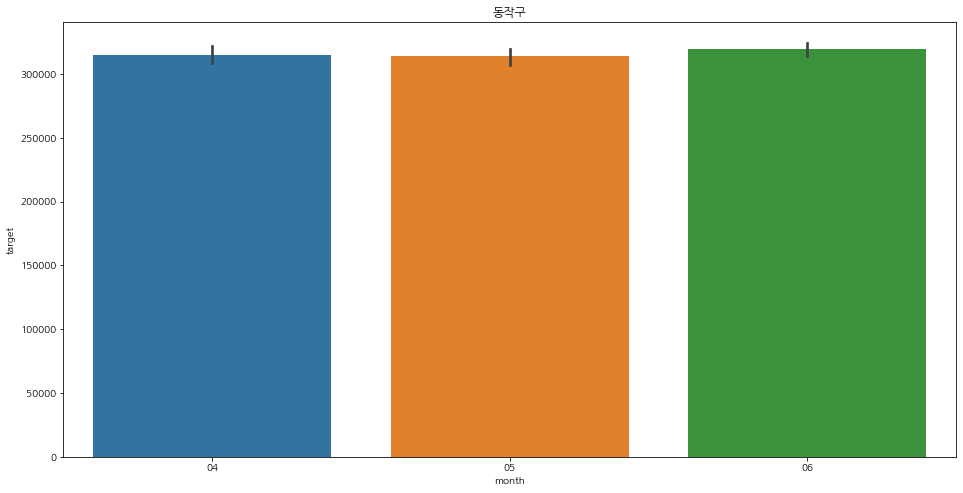

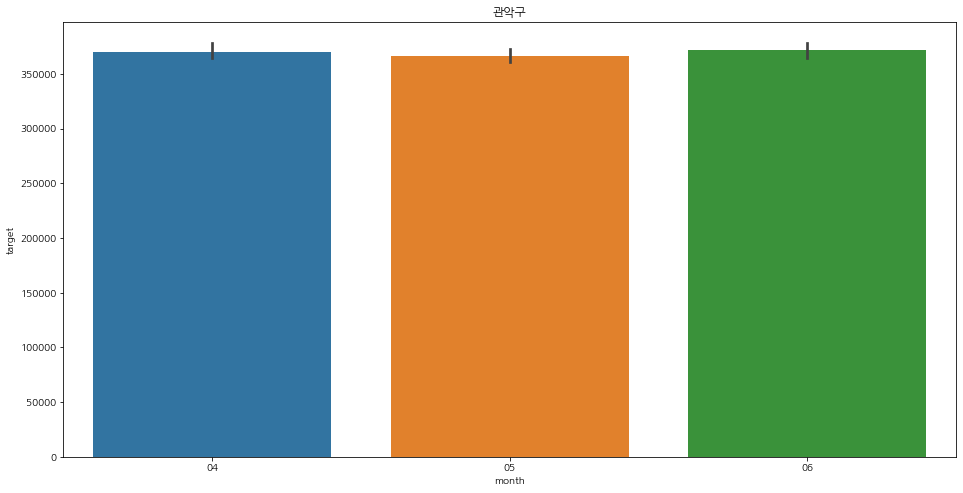

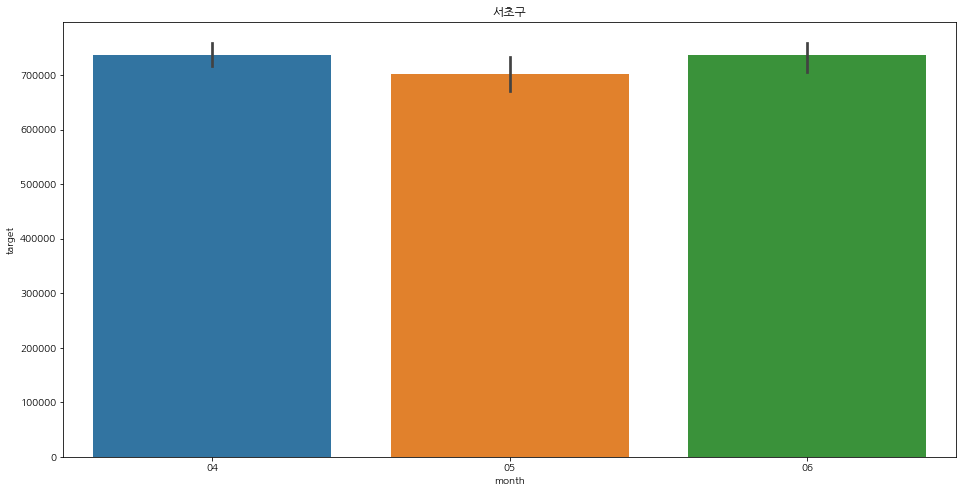

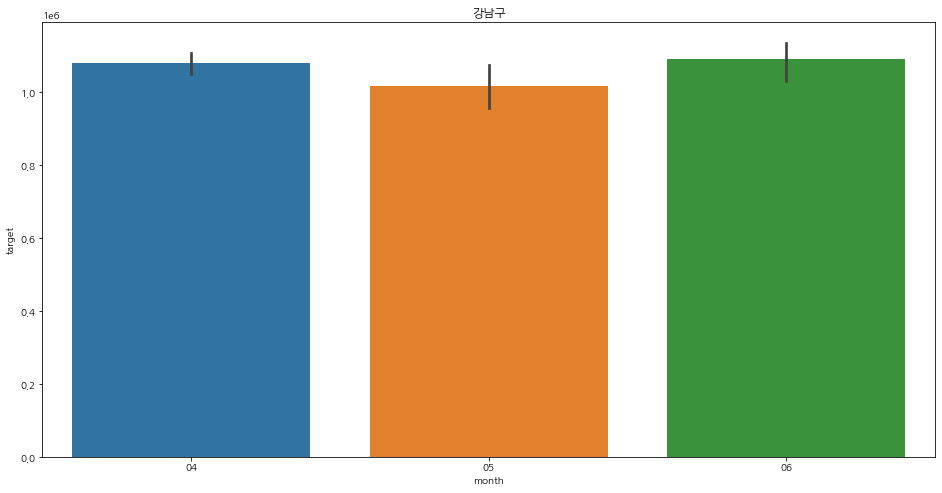

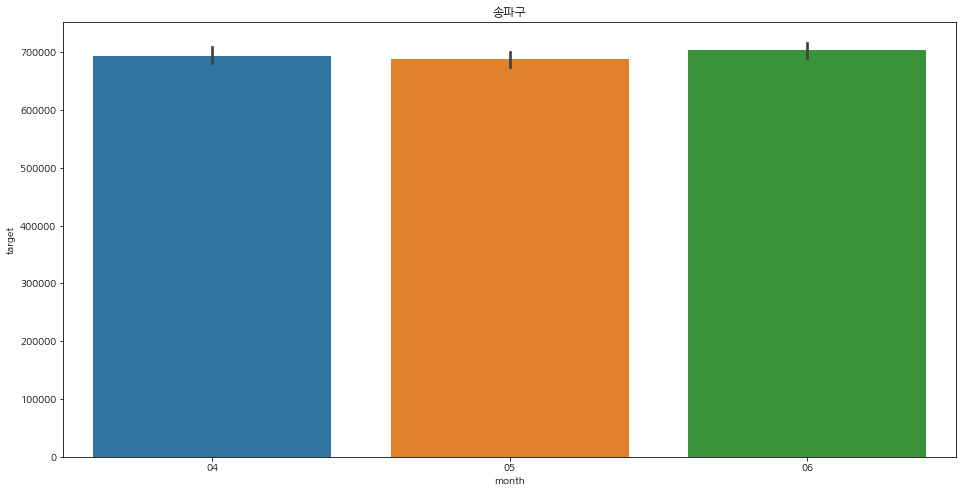

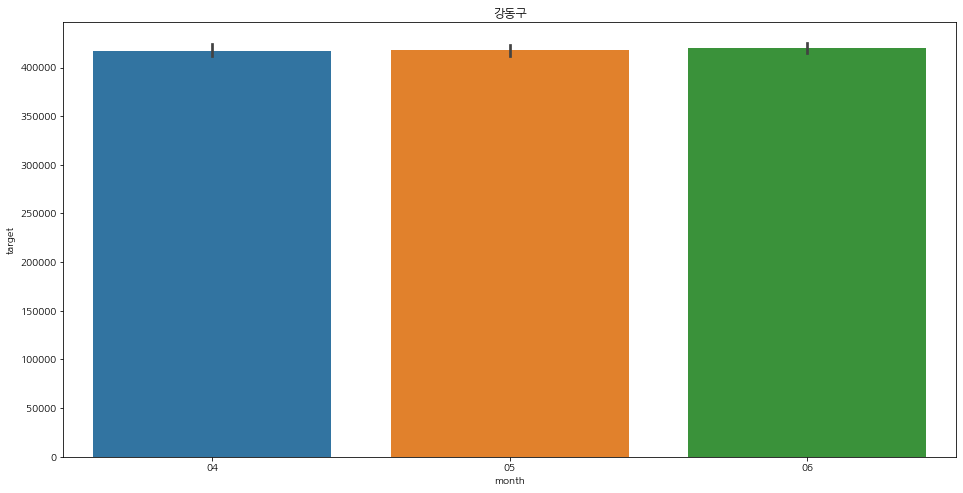

In [ ]:
# 월 별로 구별 데이터 확인해 보기
column = train['구'].unique()
for i in column:
  plt.figure(figsize = (16,8))
  sns.barplot(data = train[train['구'] == i], x = 'month', y = 'target')
  plt.title(f'{i}')
  plt.show()

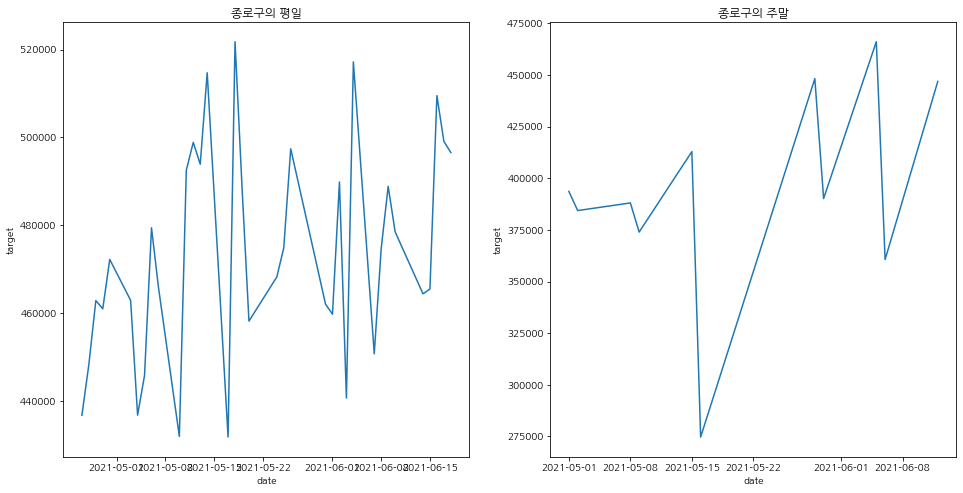

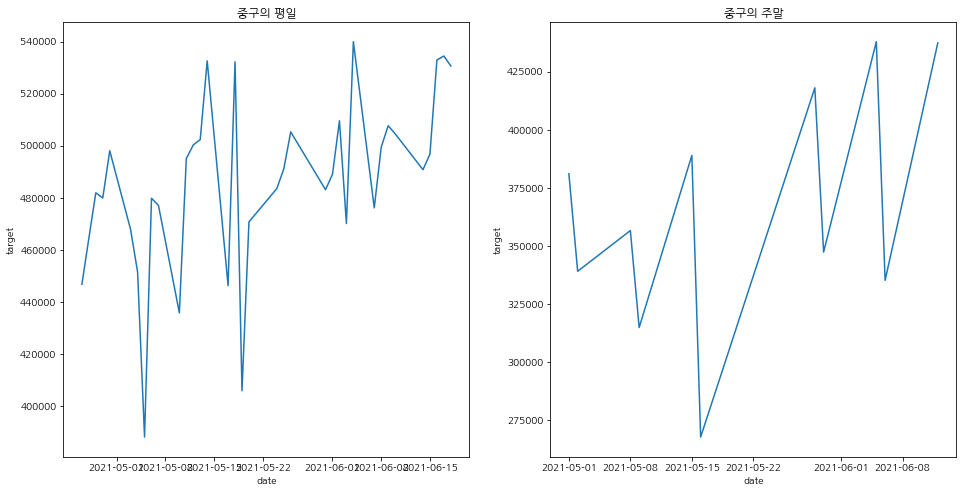

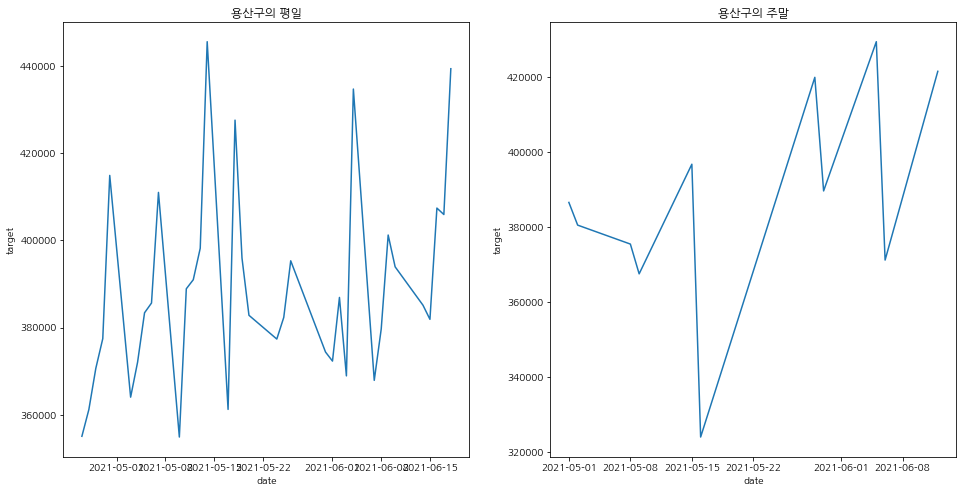

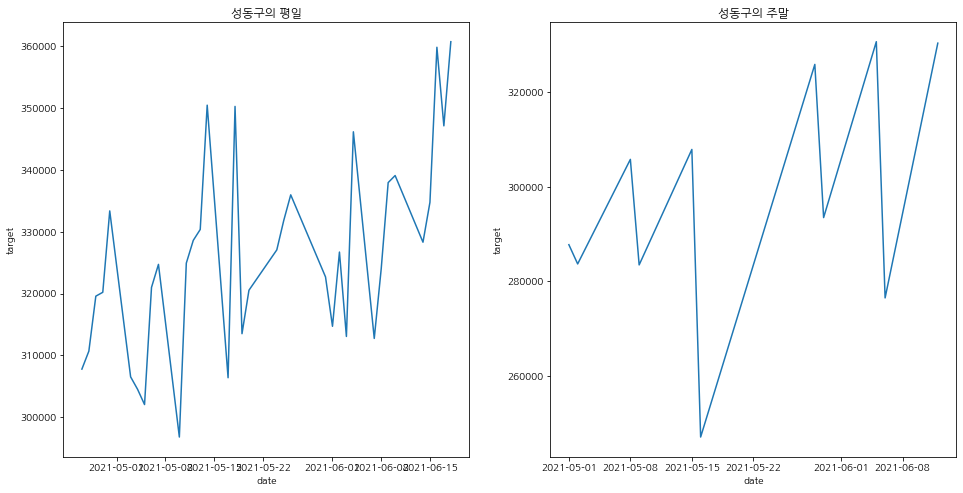

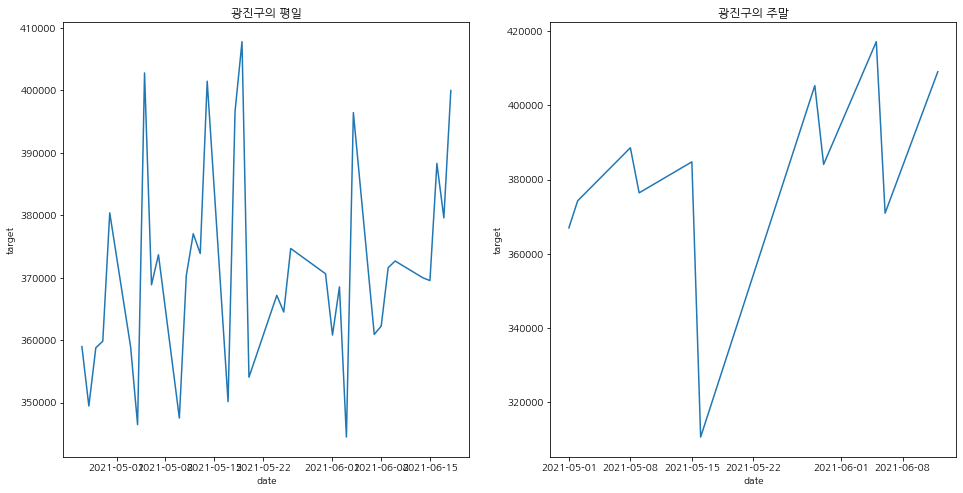

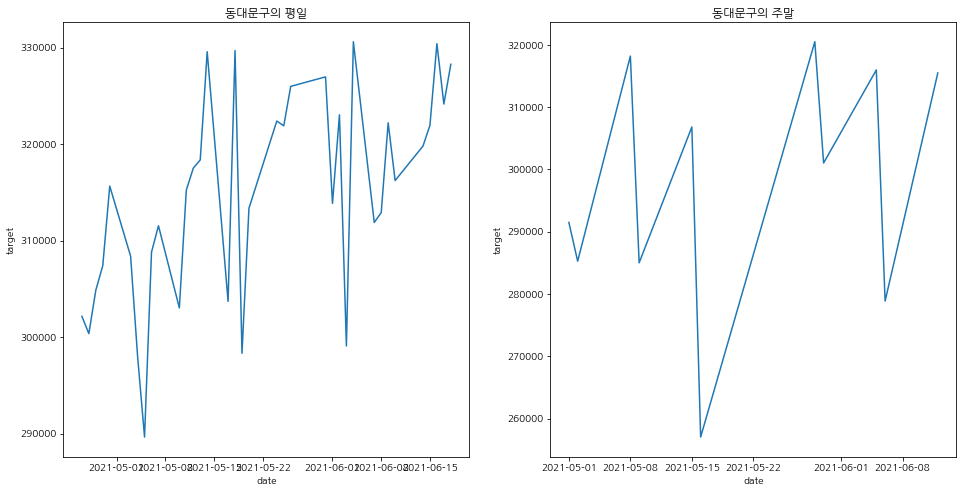

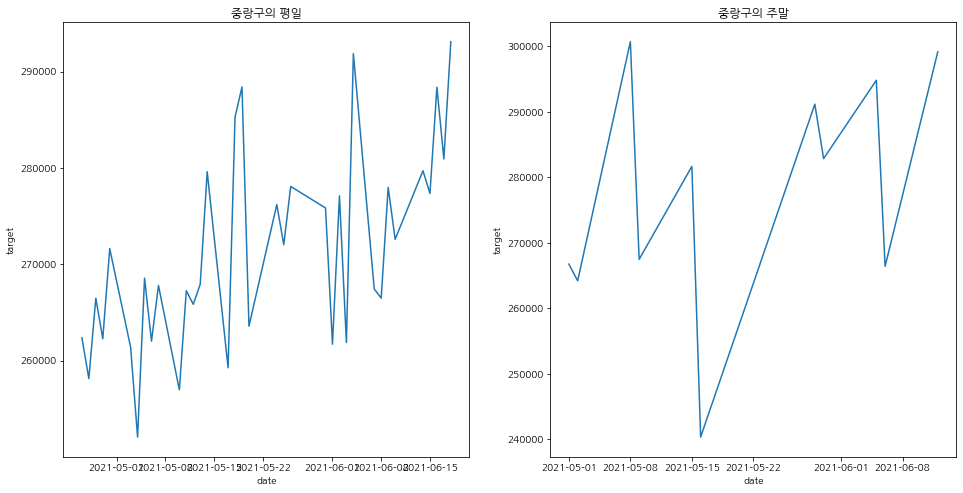

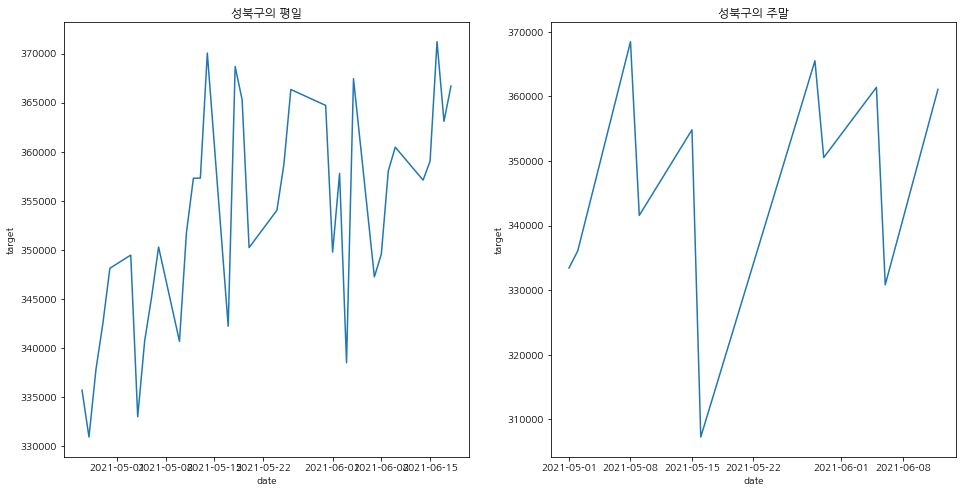

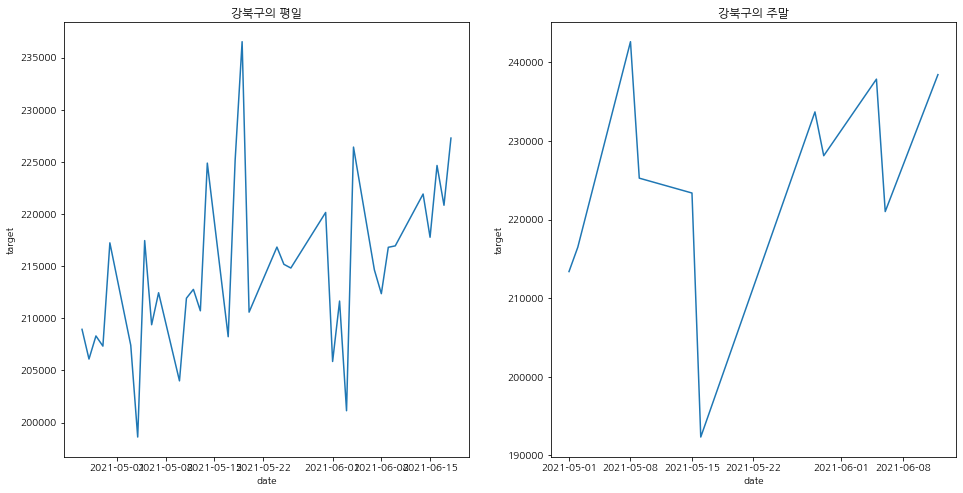

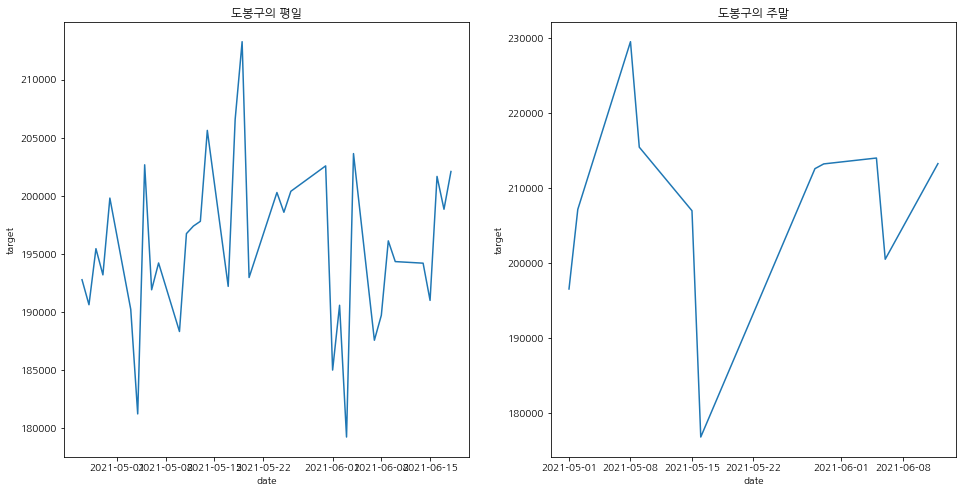

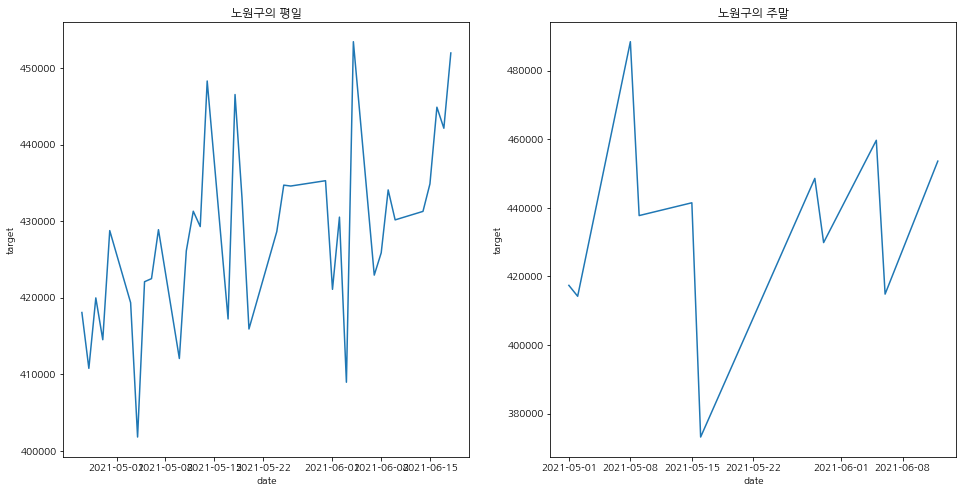

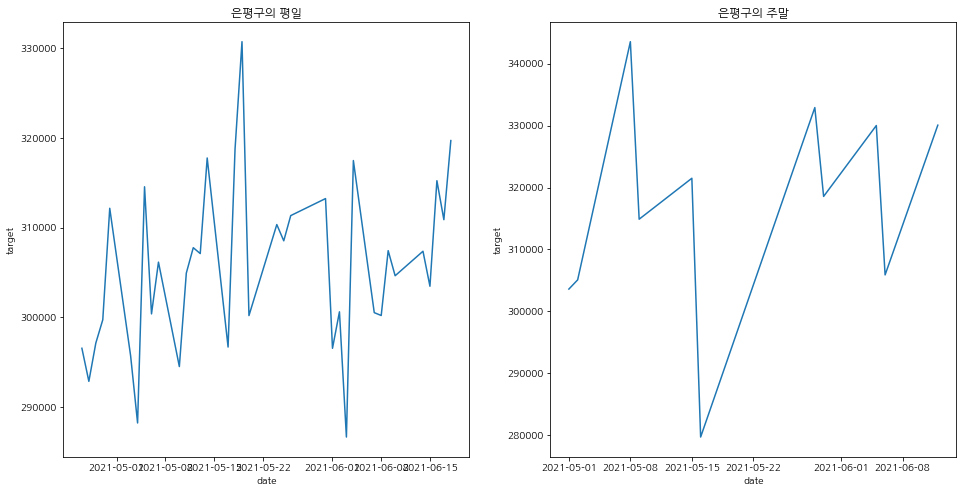

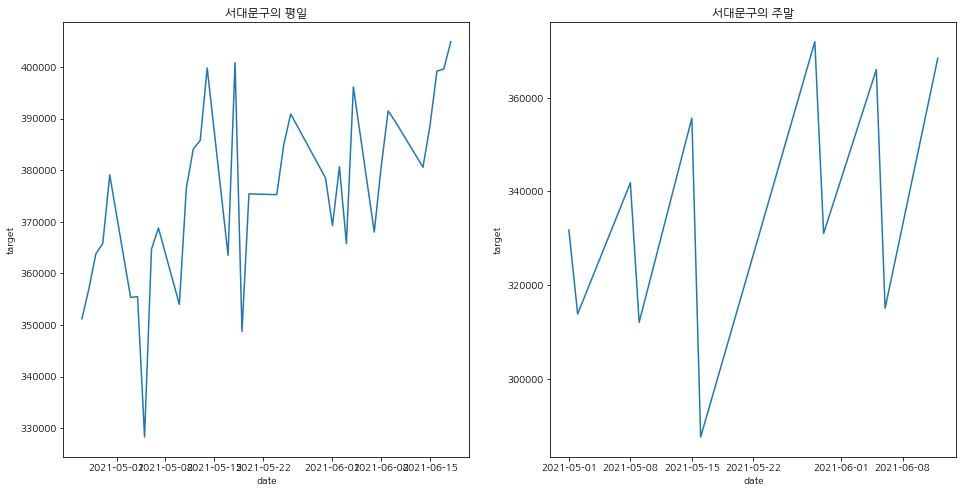

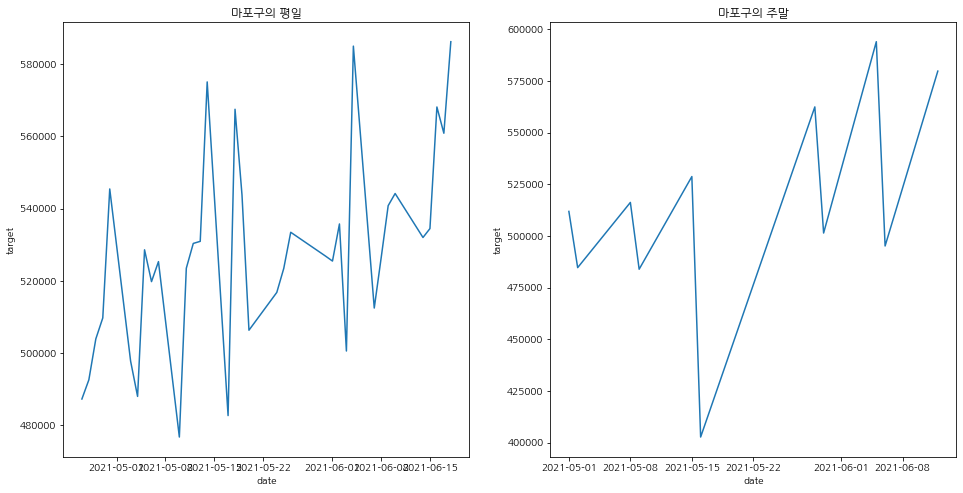

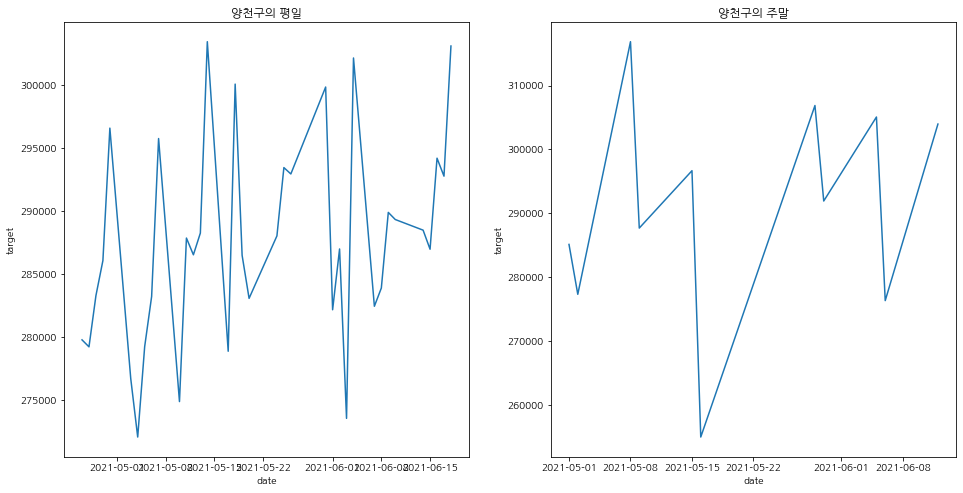

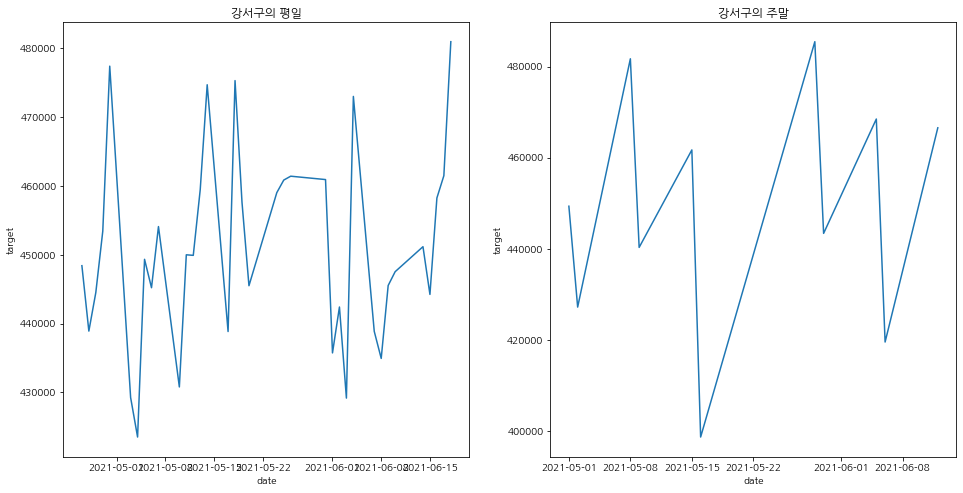

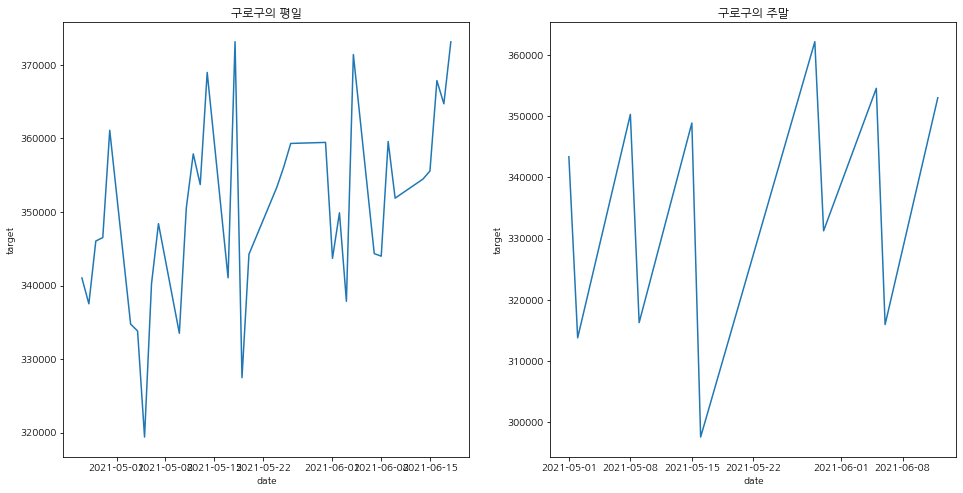

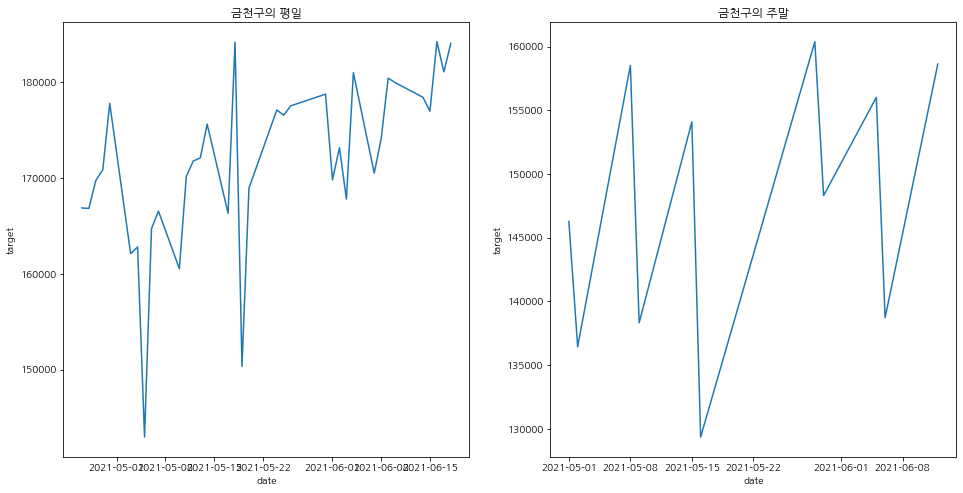

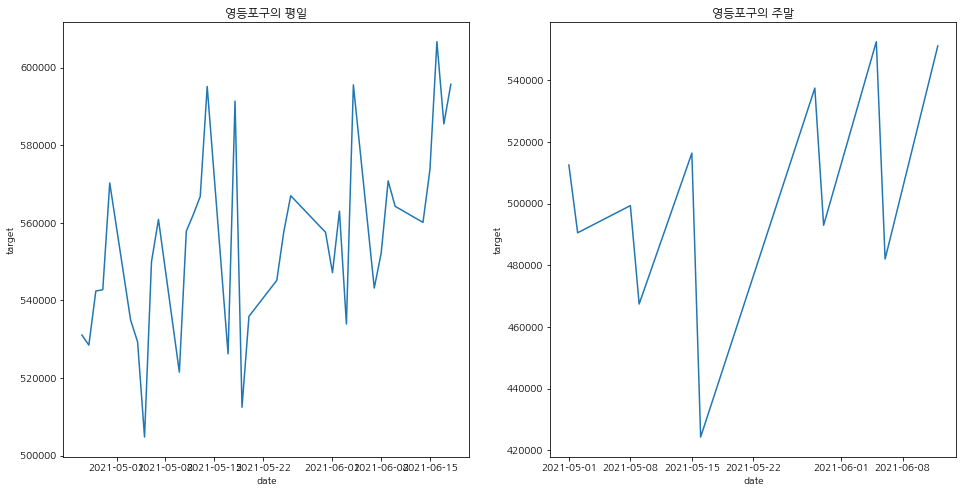

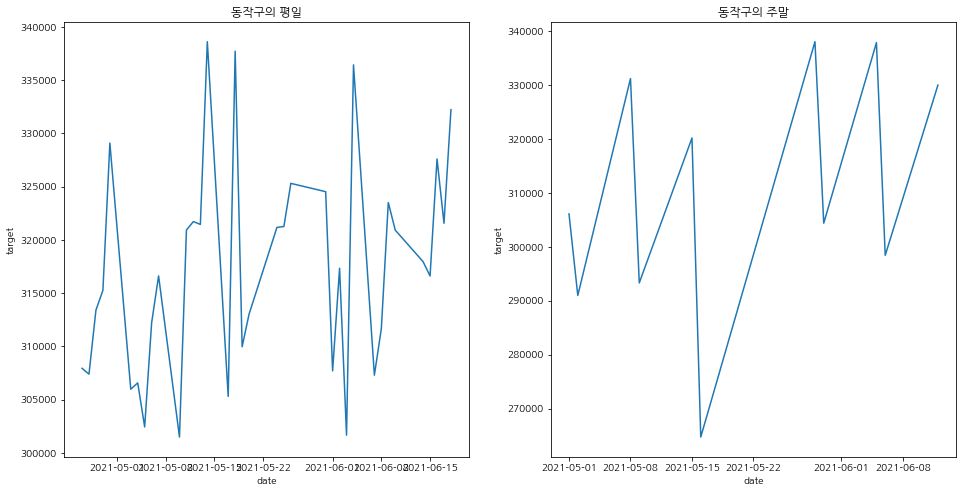

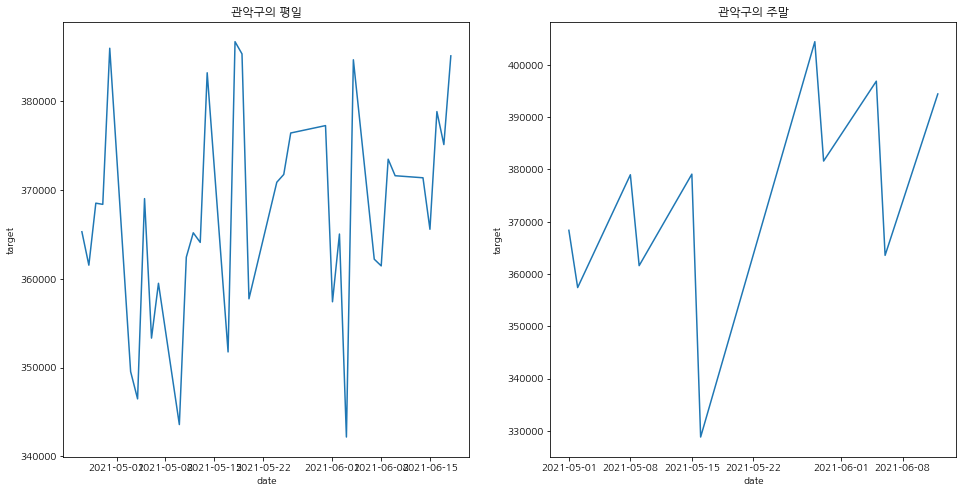

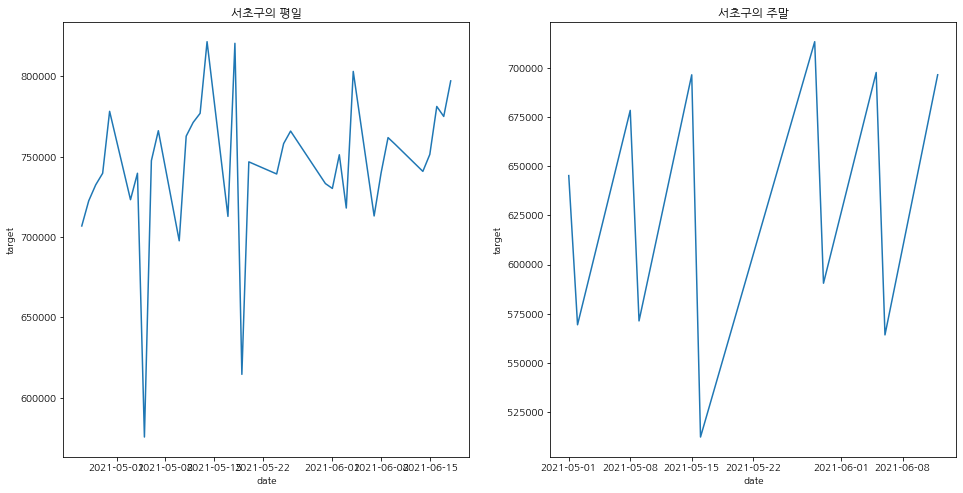

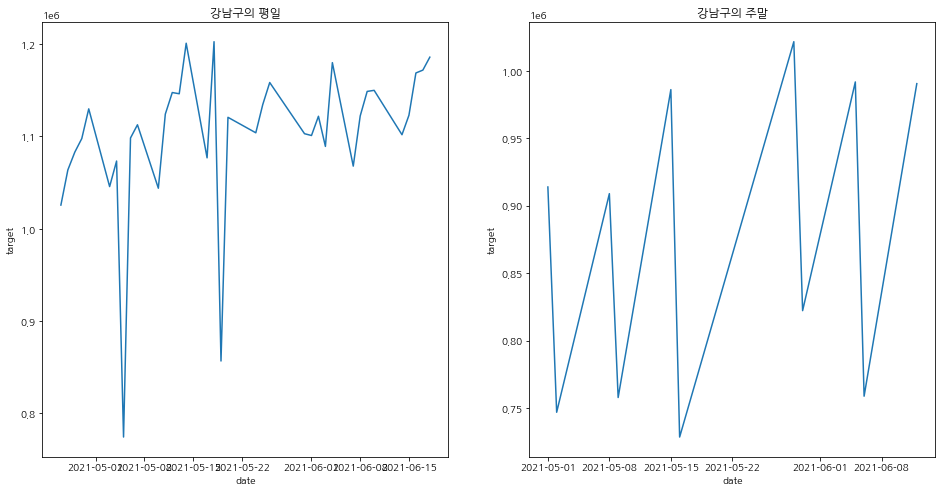

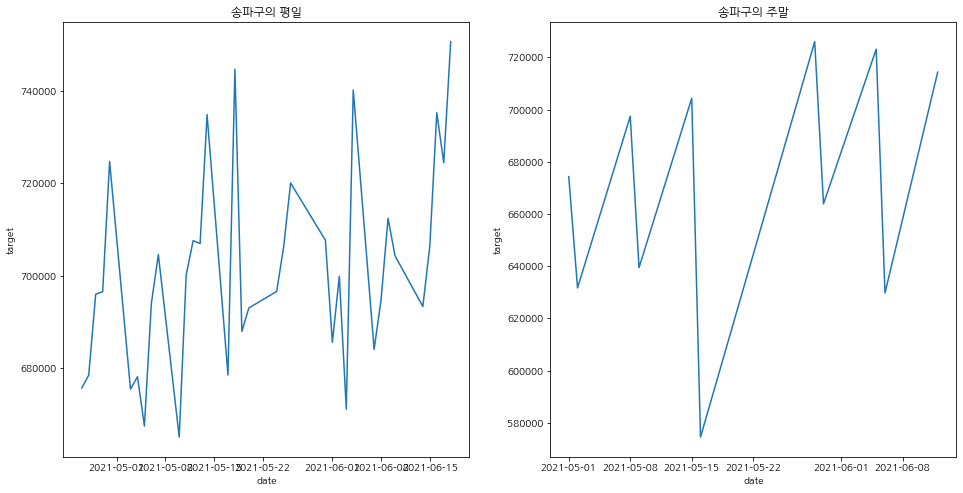

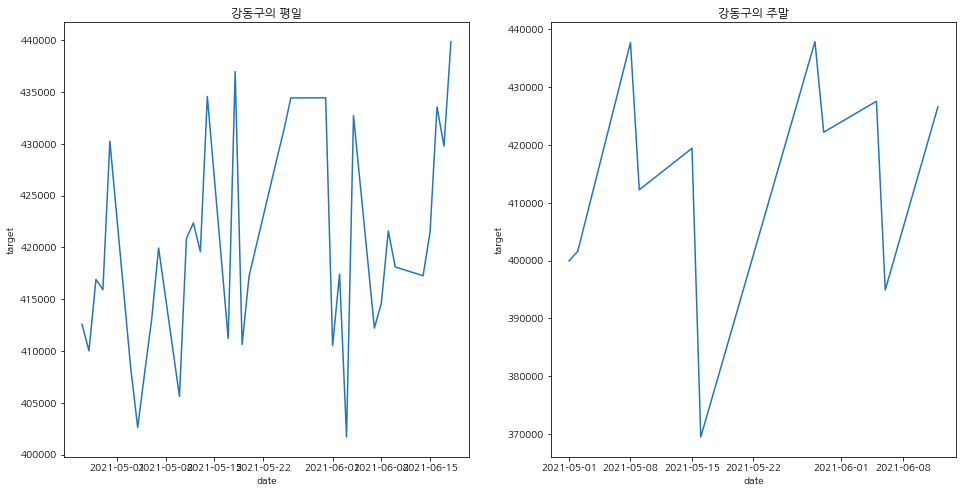

In [ ]:
# 구별로 lineplot을 그려보자.
# 구별로 평일과 주말을 한 그래프에 그려주게 된다면 겹치는 부분이 많아서 비교하기 어렵다고 판단하여 각 구별 평일 주말로 그려주게 되었다.
for i in column:
  fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
  sns.lineplot(data = train[(train['구'] == i) & (train['weekday'] == 0)], x ='date', y = 'target', ax = ax[0])
  sns.lineplot(data = train[(train['구'] == i) & (train['weekday'] == 1)], x = 'date', y = 'target', ax = ax[1])
  ax[0].set_title(f'{i}의 평일')
  ax[1].set_title(f'{i}의 주말')
  plt.show()

-  5월 15 - 22일의 데이터와 6월 1 - 8일까지의 데이터에서 갑자기 내려가는 구간을 포착했다.

- 평일의 경우는 비슷한 분포를 가지고 있는 것 같다.

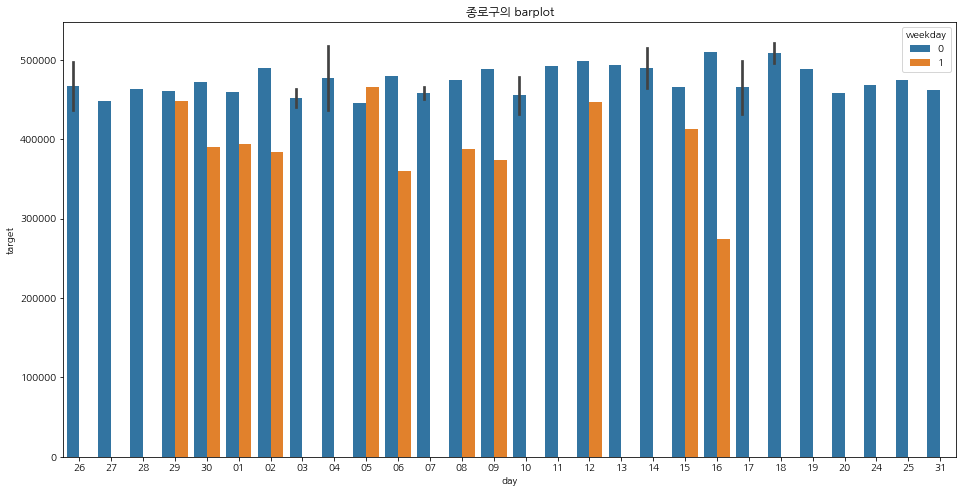

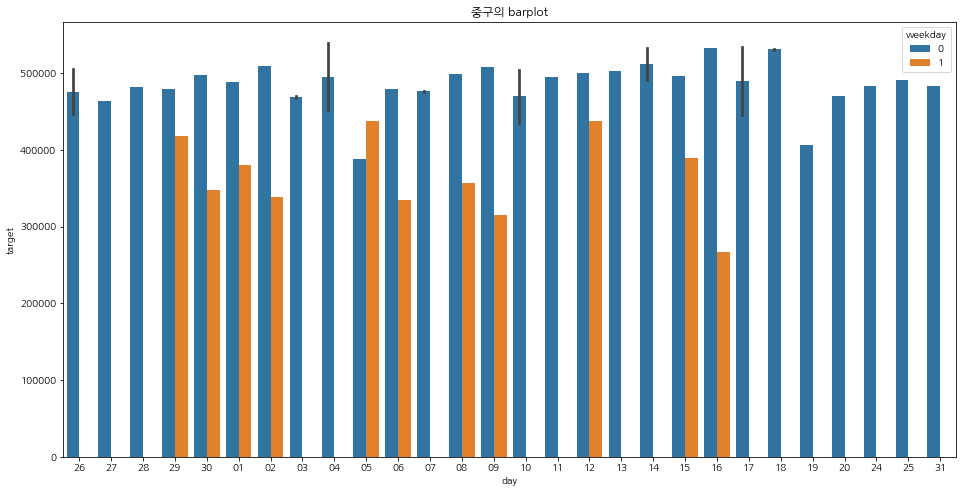

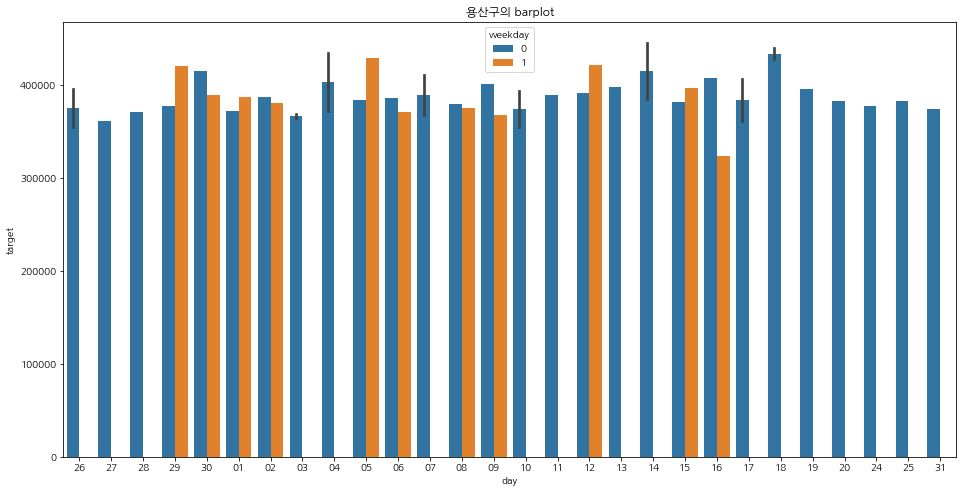

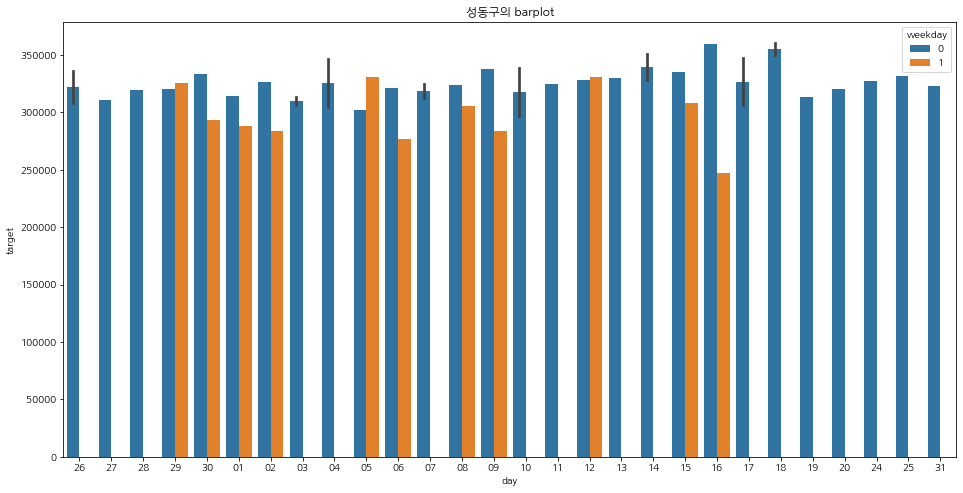

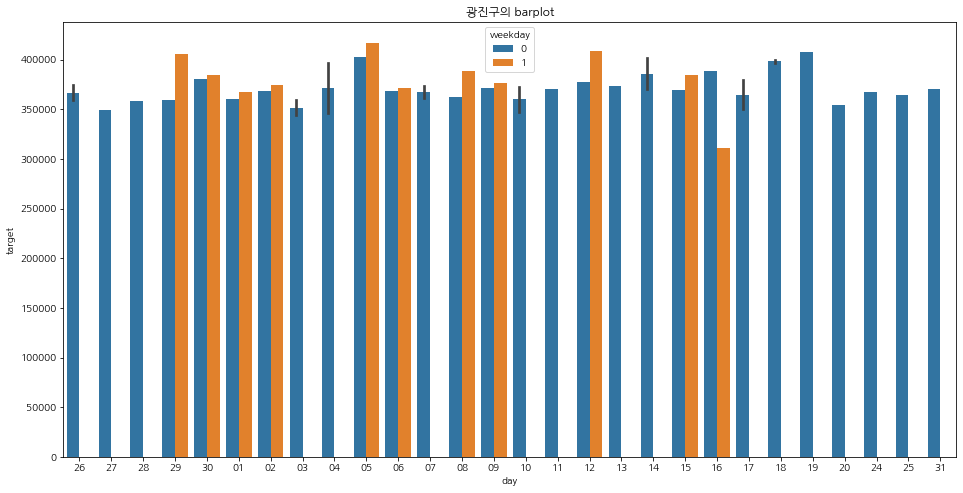

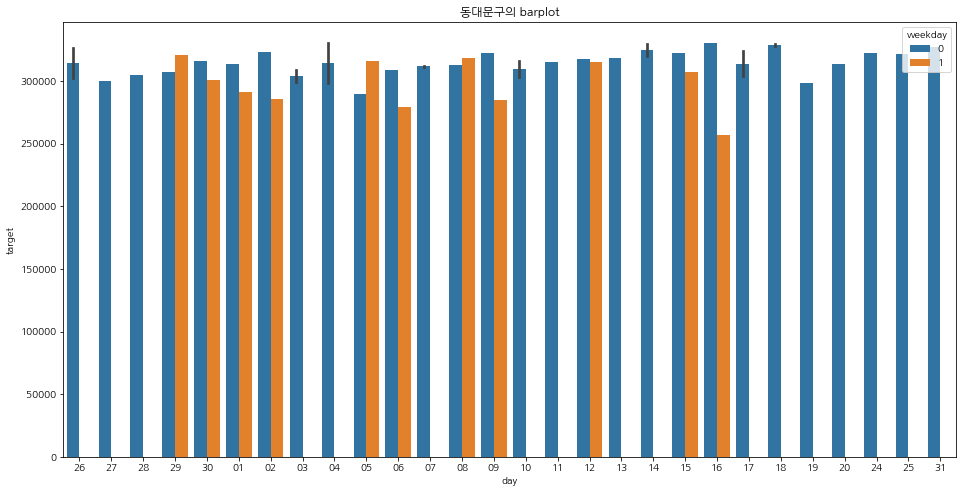

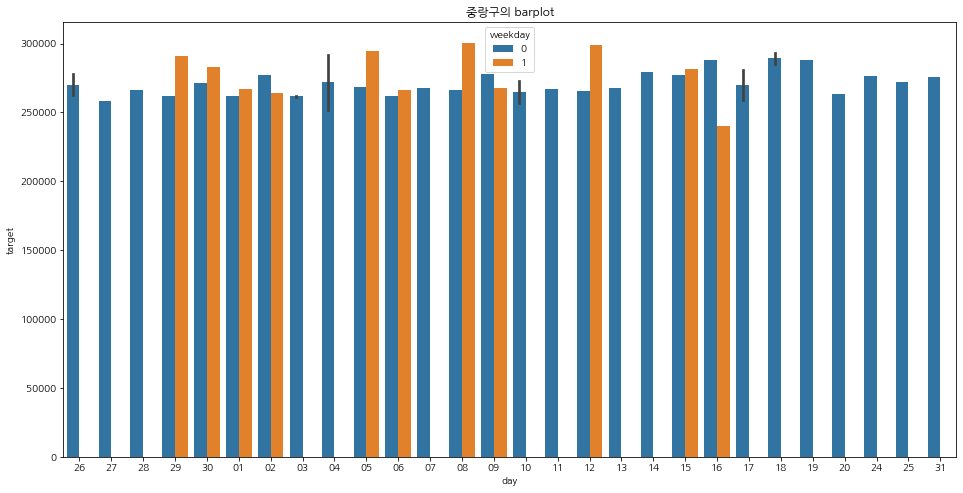

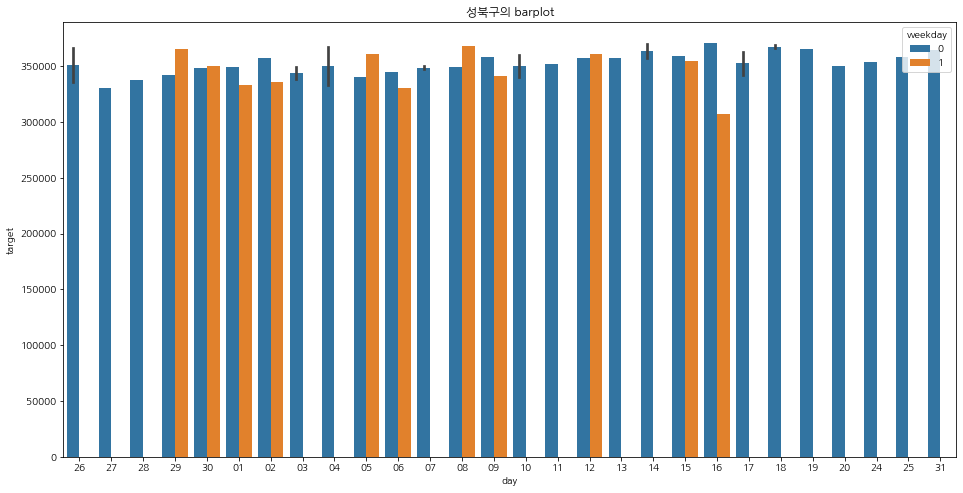

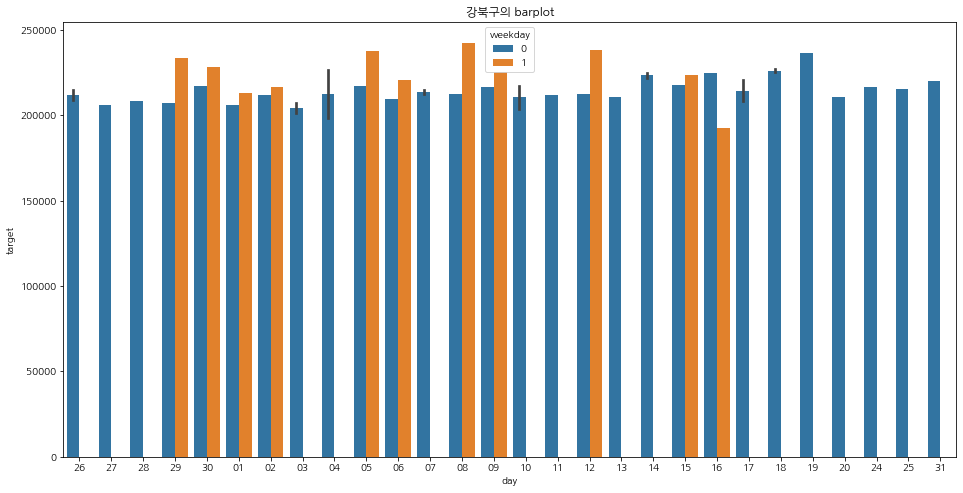

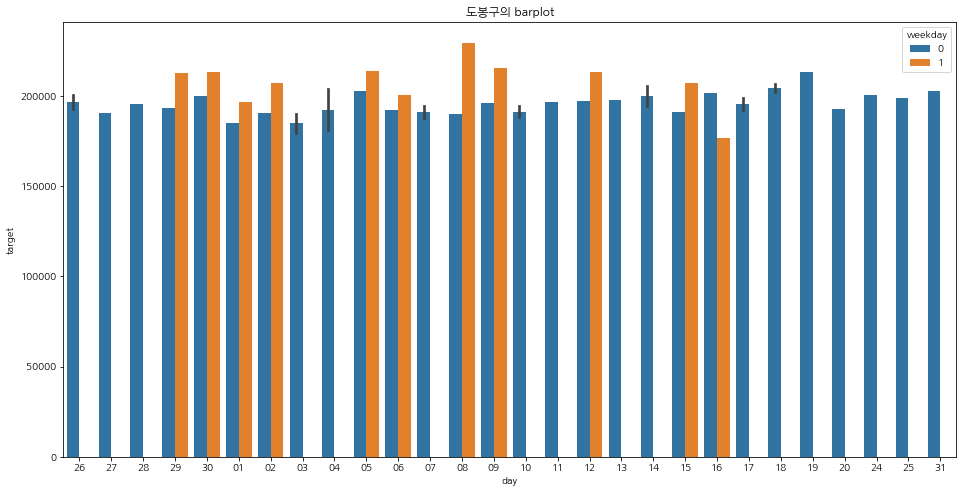

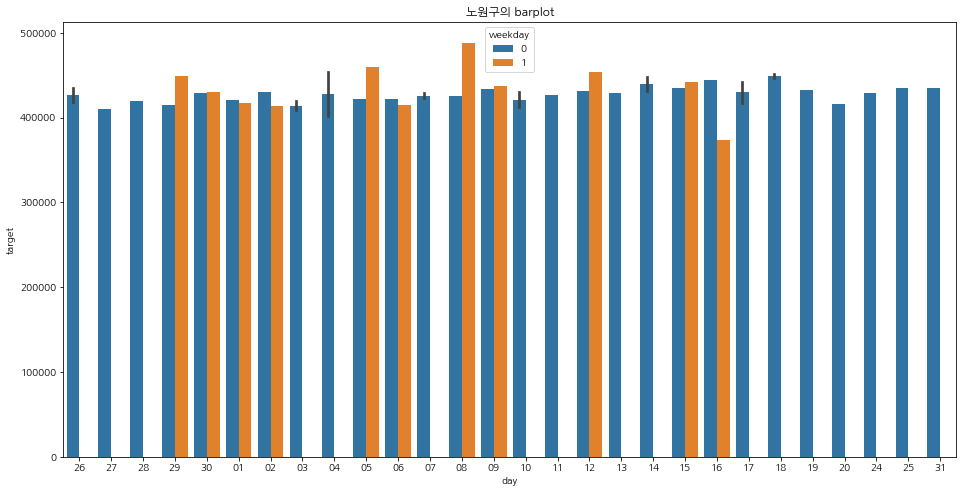

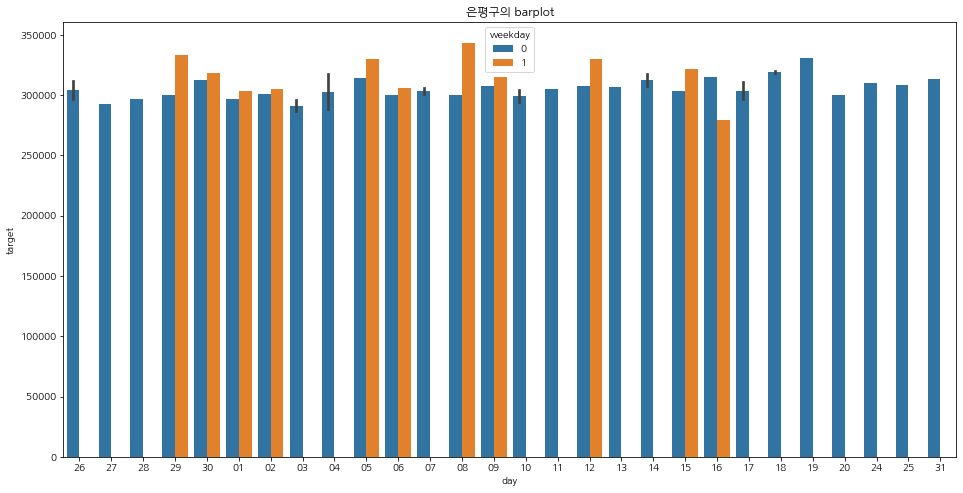

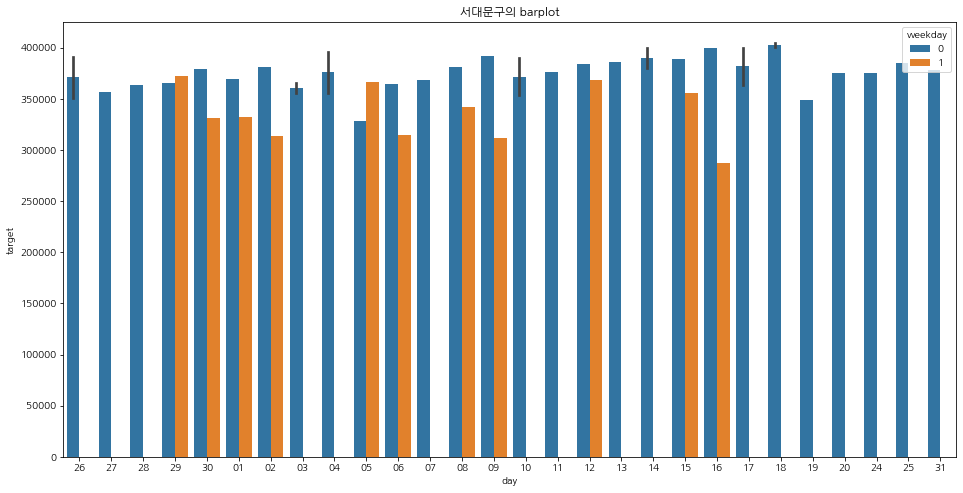

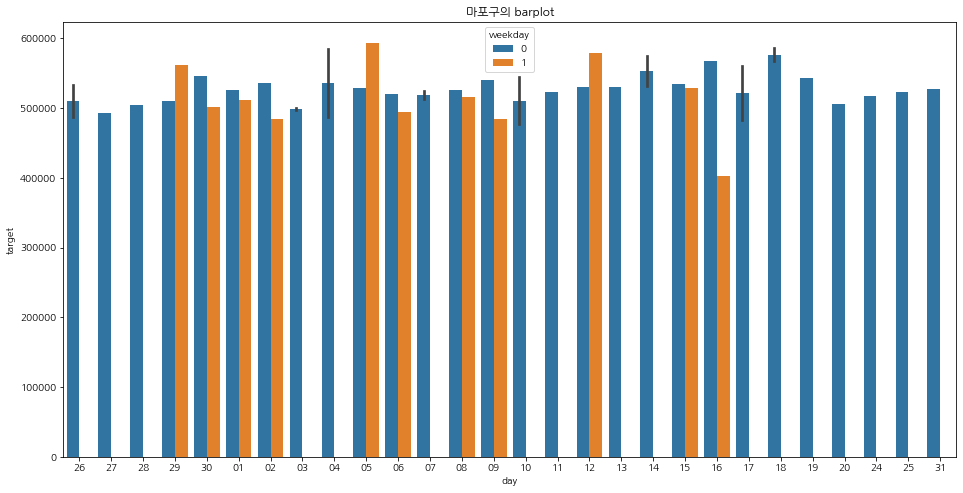

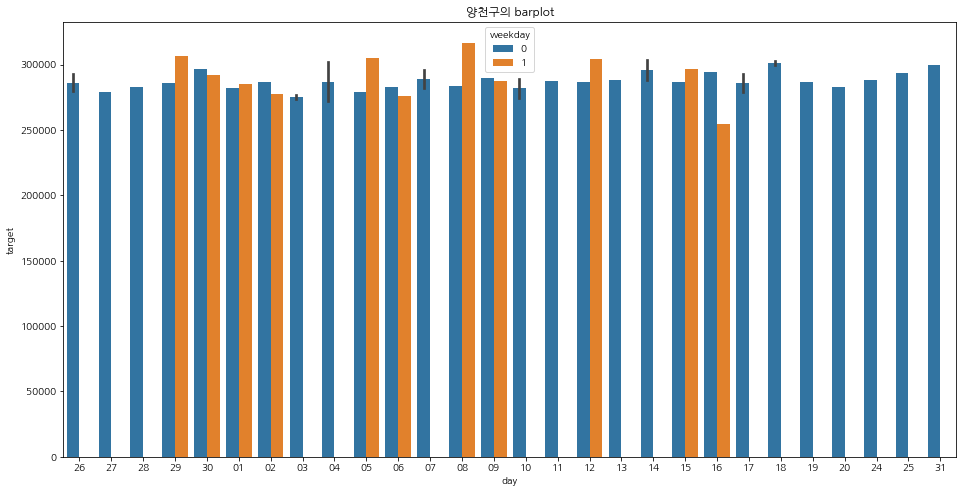

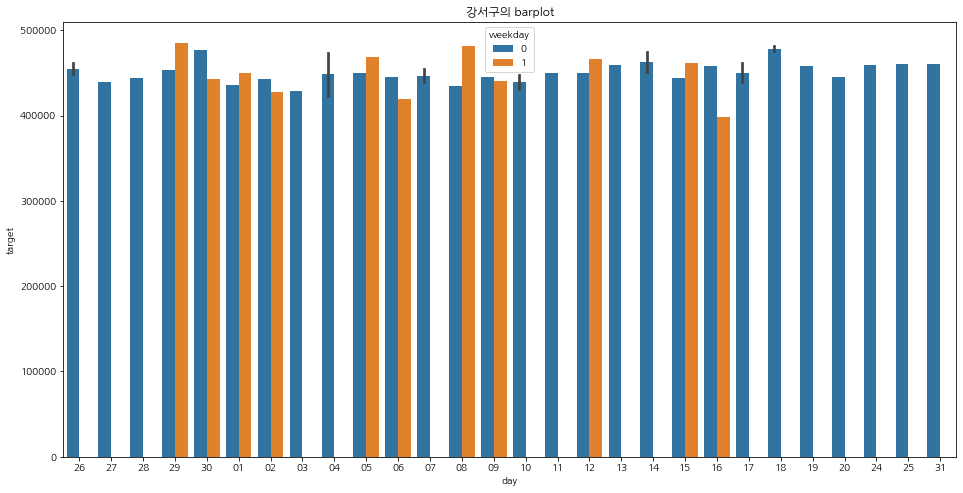

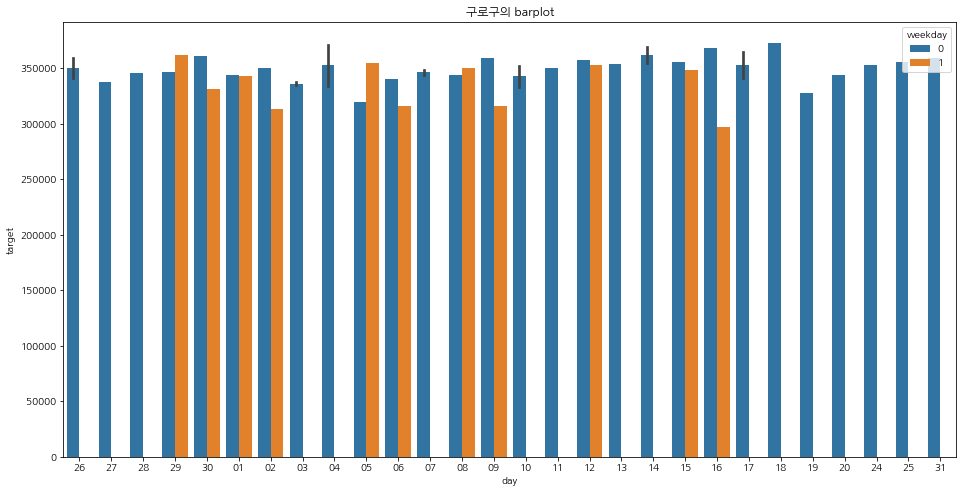

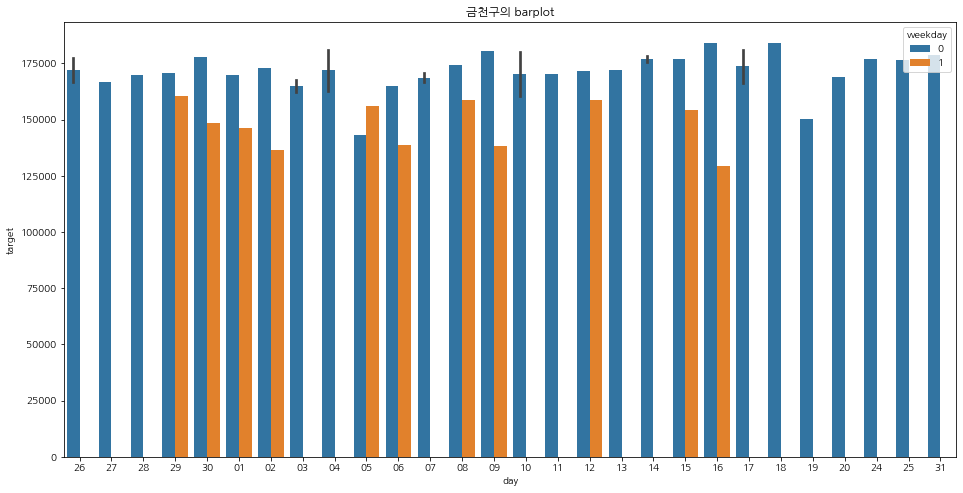

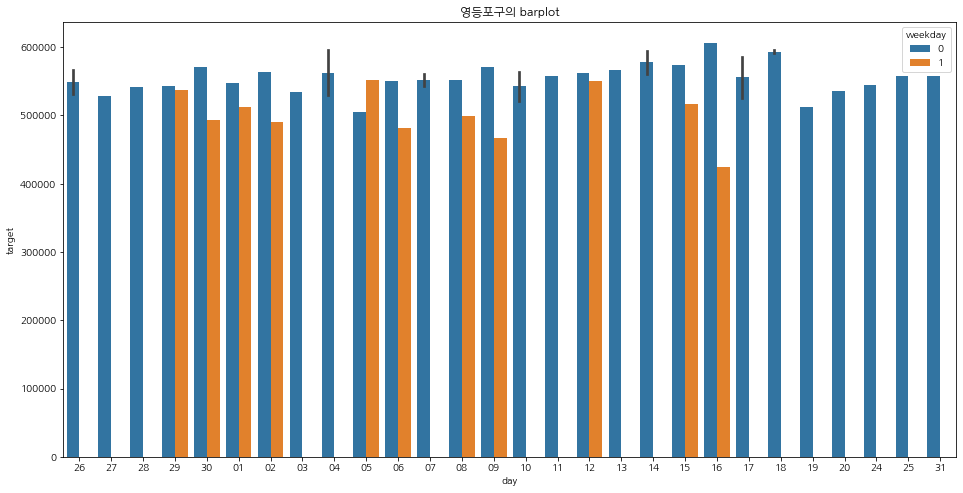

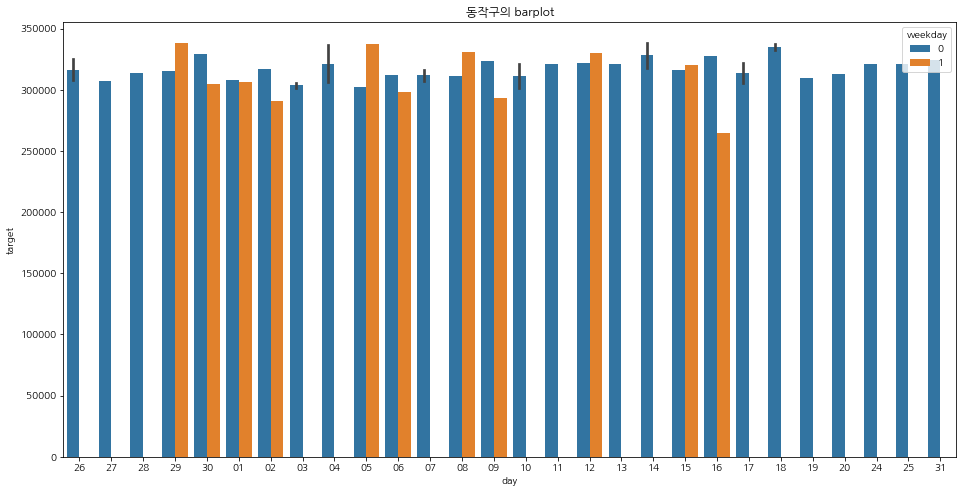

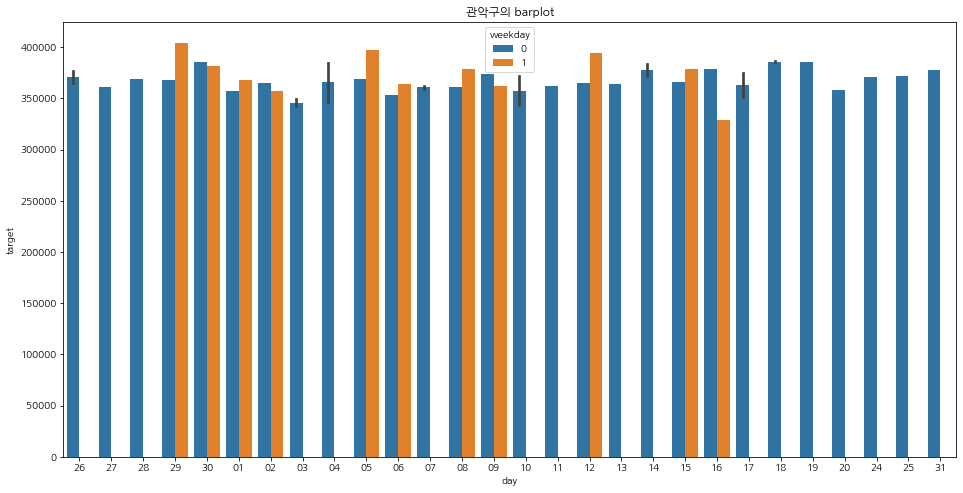

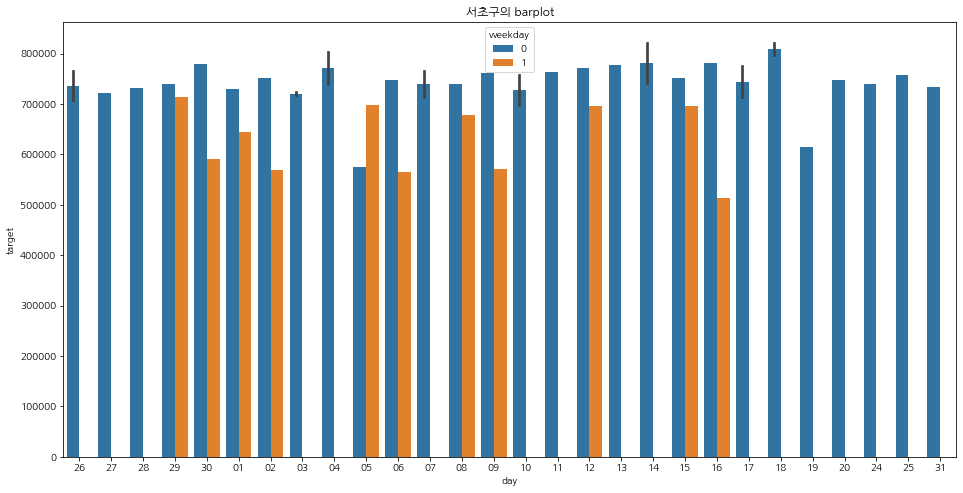

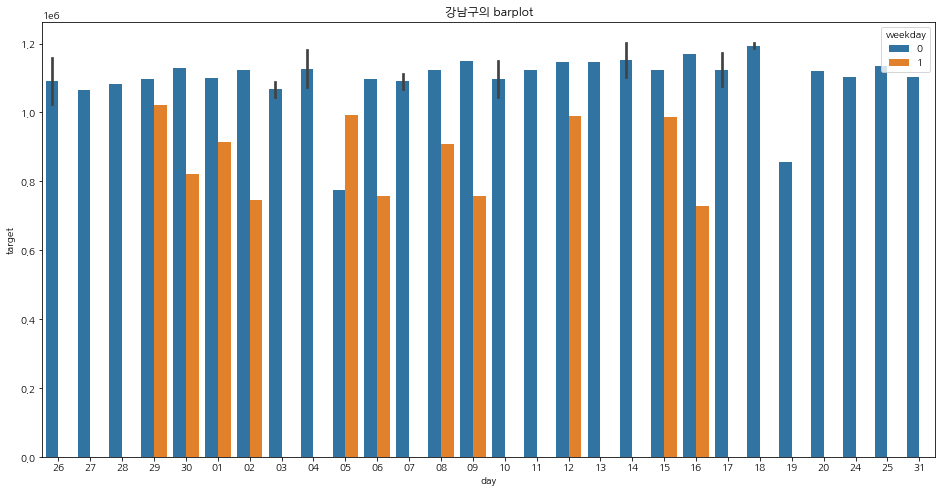

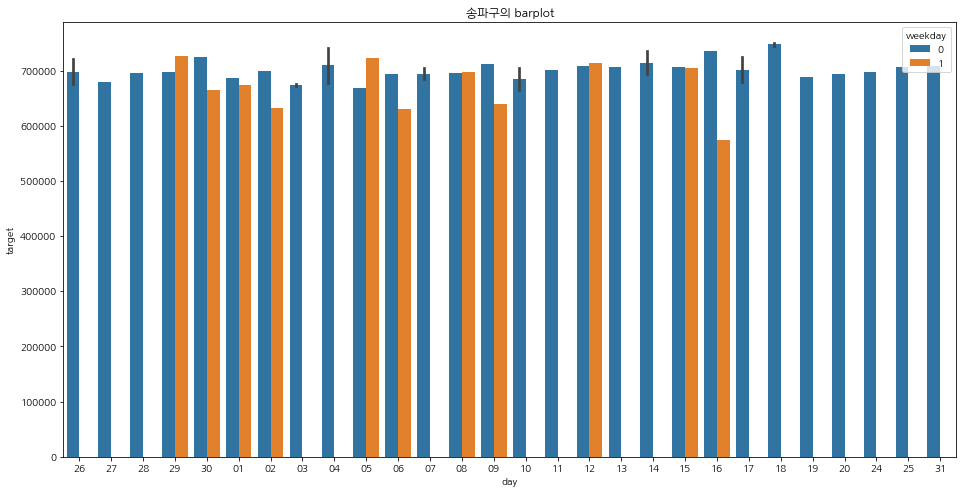

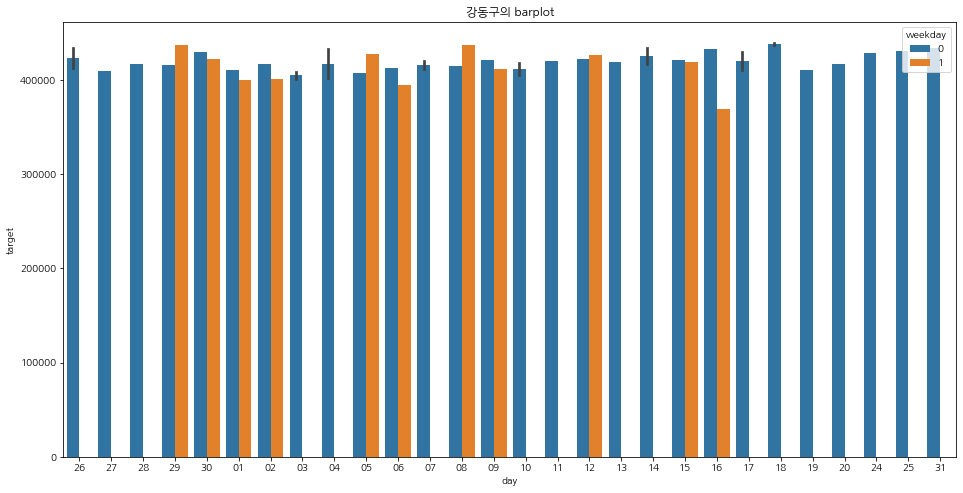

In [ ]:
# 일별로 데이터를 살펴보자.
for i in column:
  plt.figure(figsize = (16,8))
  sns.barplot(data = train[train['구'] == i], x = 'day', y  = 'target', hue = 'weekday')
  plt.title(f'{i}의 barplot')
  plt.show()

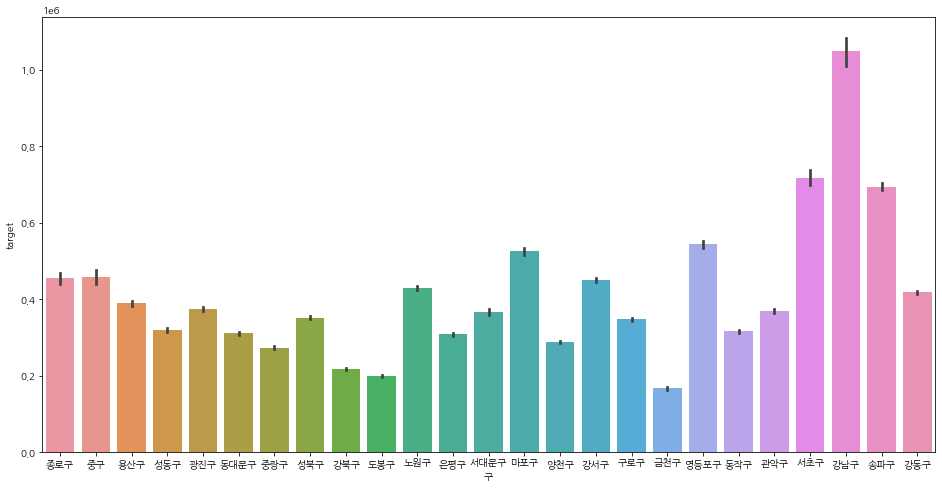

In [ ]:
# 구별로 얼마나 차이가 있는지 확인해 보자.
plt.figure(figsize  = (16,8))
sns.barplot(data = train, x = '구', y = 'target')

# 데이터를 보게 되면 강남구로 놀러가는 사람이 제일 많고 두 번째는 서초구가 많은 것으로 나타난다.
# 그러면 강남구에 평일? 주말? 언제 많이 오는지 찾아보도록 하자.

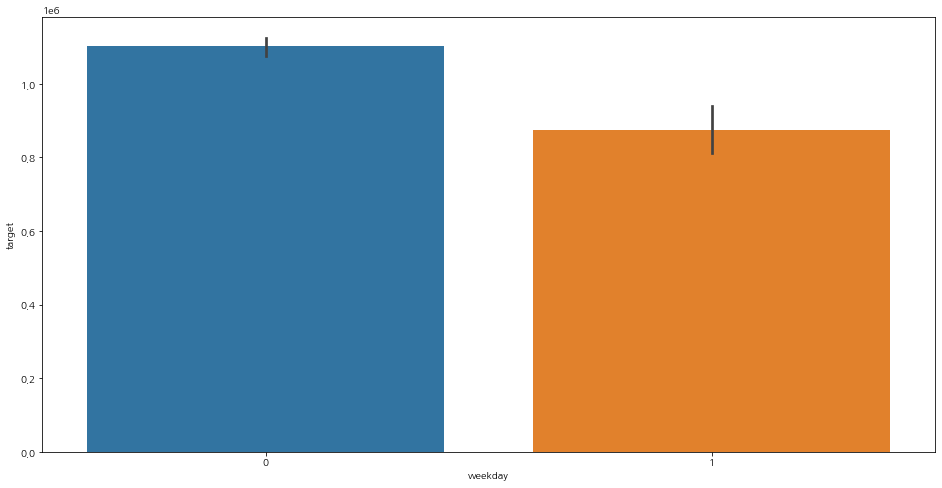

In [ ]:
# 강남구는 평일에 많은 사람들이 여행을 오는 것을 알 수 있다.
plt.figure(figsize = (16,8))
sns.barplot(data =train[train['구'] == '강남구'], x = 'weekday', y = 'target')

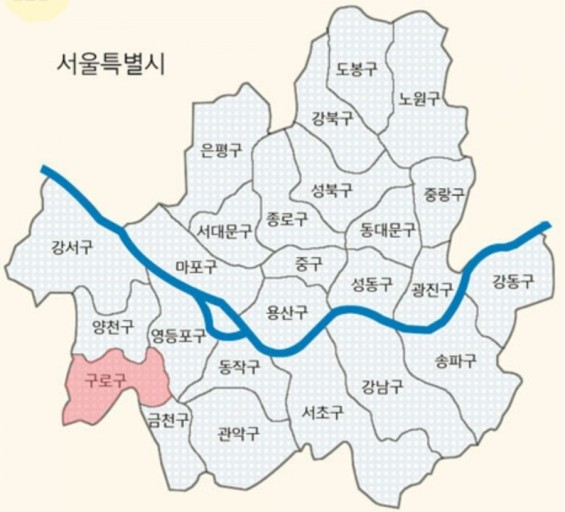


- 데이터를 보면 서초구, 강남구, 송파구의 지역이 뭉쳐있다는 것을 확인할 수 있다.
- 그러면 데이터를 살펴볼 때 이 지역에 왜 많이 갔는지 분석을 진행해 봐야 겠다.

외국 관광객이 많이 찾는 이유
https://www.gangnam.go.kr/board/B_000031/16848/view.do?mid=FM0313
- 쇼핑, 강남 명소 방문이 주를 이루고 있다.

Text(0.5, 1.0, '서초구 date별 관광객 수')

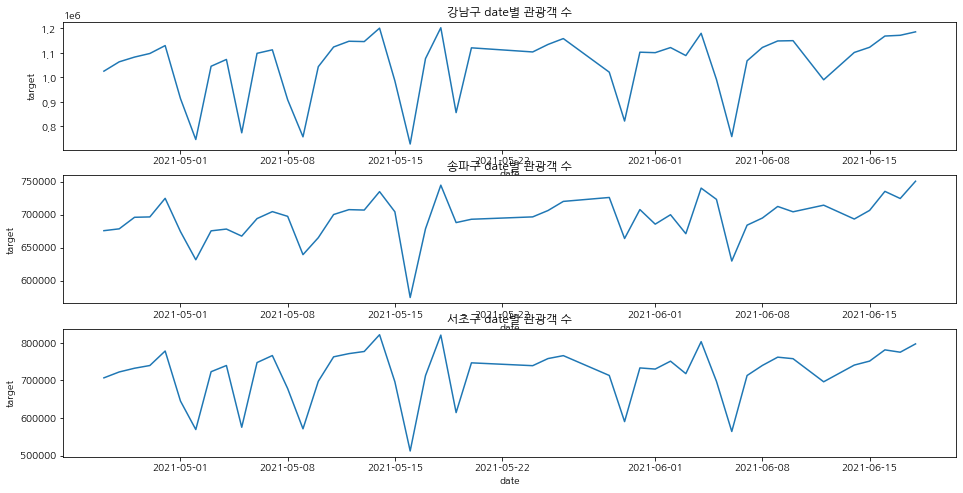

In [ ]:
# 가장 가까이 많은 관광객이 오는 강남구, 송파구, 서초구의 데이터를 시간의 흐름에 따라 그래프를 그린다.
fig, ax = plt.subplots(nrows = 3, figsize =(16,8))
sns.lineplot(data = train[train['구'] == '강남구'], x = 'date', y = 'target', ax = ax[0])
sns.lineplot(data = train[train['구'] == '송파구'], x = 'date', y = 'target', ax =ax[1])
sns.lineplot(data = train[train['구'] == '서초구'], x = 'date', y = 'target', ax = ax[2])
ax[0].set_title('강남구 date별 관광객 수')
ax[1].set_title('송파구 date별 관광객 수')
ax[2].set_title('서초구 date별 관광객 수')

- 3개의 구가 비슷한 분포를 따르는 것을 확인했다.
- 그러면 무슨 이유로 가는지 확인해 보자.

# 날씨 데이터

In [ ]:
# 날씨 데이터 불러오기
weather = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/기상청_관광코스별_관광지_상세날씨/시군구별관광기후지수_2021.csv')

weather = weather[weather['시도'] == '서울']
weather = weather.rename(columns = {'시군구':'구'})
weather.head(5)

,예보시각,전체 도시 이름,시도,구,시군구코드,관광기후지수,관광기후지수등급
0,2021-06-20 00:00,서울 강남구,서울,강남구,1168000000,0.37,매우좋음
1,2021-06-19 00:00,서울 강남구,서울,강남구,1168000000,0.48,매우좋음
2,2021-06-18 00:00,서울 강남구,서울,강남구,1168000000,-0.16,보통
3,2021-06-17 00:00,서울 강남구,서울,강남구,1168000000,0.10,보통
4,2021-06-16 00:00,서울 강남구,서울,강남구,1168000000,0.29,좋음


In [ ]:
# 데이터를 target변수와 비교하기 위해서 데이터를 나눠준다.
weather['예보시각'] = pd.to_datetime(weather['예보시각'])
weather['date'] = weather['예보시각'].dt.date
weather['date'] = pd.to_datetime(weather['date'])
# weather['weekend'] = weather['예보시각'].apply(lambda x:x.weekday())
# weather['weekday'] = weather['weekend'].apply(lambda x:1 if x > 4 else 0)

# weather데이터를 train데이터의 범위와 같게 설정해 준다.
# 4월 26일 ~ 6월 18일
weather = weather[(weather['date'] <= '2021-06-18') & (weather['date'] >= '2021-04-26')]

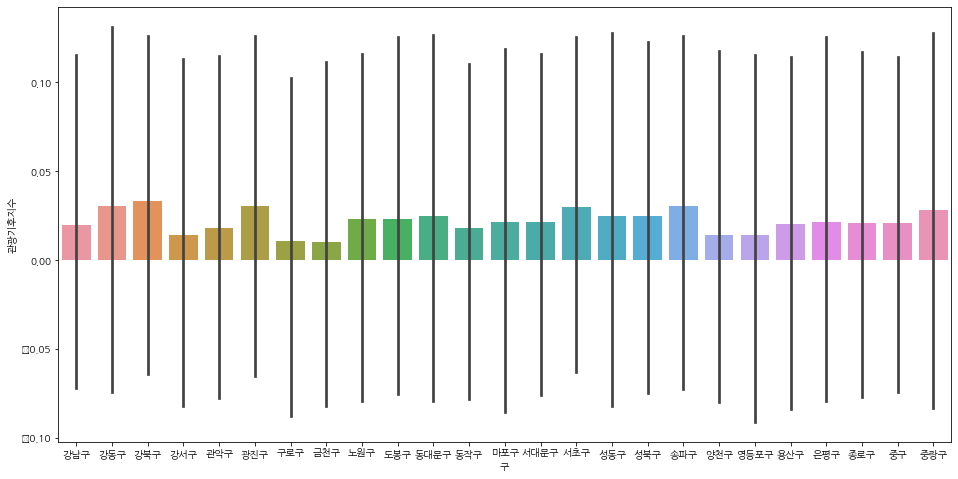

In [ ]:
# 구별로 관광기후지수의 차이를 알아보자.
plt.figure(figsize = (16,8))
sns.barplot(data = weather, x = '구', y = '관광기후지수')

# 시군구로 관광기후지수를 나타내면 안된다는 것을 알게 됩니다!

In [ ]:
train['date'] = pd.to_datetime(train['date'])

In [ ]:
# 데이터 합쳐주기
data = pd.merge(train,weather, how = 'left', on = ['구','date'])

In [ ]:
# 잘 합쳐졌는지 확인해 보자.
# '구'가 몇개 있는지 알아보자.
print('구의 개수',len(data['구'].unique()))

# 데이터를 date의 개수를 알아본다.
print('구의 개수를 date의 개수만큼 나눴을 때 구의 개수만큼 나오는지 확인한다.'
,len(data)/len(data['date'].unique()))

# 데이터가 merge로 잘 합쳐졌다.

구의 개수 25
구의 개수를 date의 개수만큼 나눴을 때 구의 개수만큼 나오는지 확인한다. 25.0


# 기후 데이터 가져오기

In [ ]:
# weather = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/Proj_WT/DataSets/2017년부터2021년까지서울기후데이터.csv')
# weather = weather.rename(columns = {'예보시각':'date'})

In [ ]:
# weather.head()

In [ ]:
# weather['date'] = pd.to_datetime(weather['date'])
# weather = weather[(weather['date'] <= '2021-06-18') & (weather['date'] >= '2021-04-26')]

In [ ]:
# 나중에 구별 데이터를 가져와서 분석을 다시 진행해야 할 것 같다.

# 데이터 분석하기

In [ ]:
# 구별코드, date_time, 예보시각, 전체 도시 이름, 시도, 시군구코드를 제외해 주자.
data = data.drop(['구별코드','date_time','예보시각','전체 도시 이름','시도','시군구코드','touDivCd','dayofyear','year'], axis = 1)

Text(0.5, 1.0, '구 별로 기후지수')

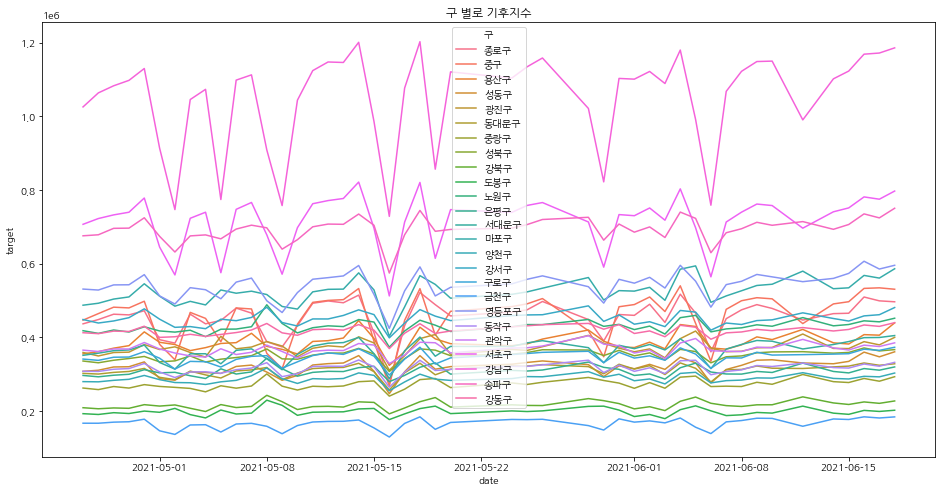

In [ ]:
# 데이터를 살펴봤을 떄 거의 비숫한 분포를 따르고 있다.
# 각 구별로 더미화를 진행해주고 target변수를 맞추도록 해봐야 겠다.
plt.figure(figsize = (16,8))
sns.lineplot(data = data, x = 'date', y = 'target', hue = '구')
plt.title('구 별로 기후지수')

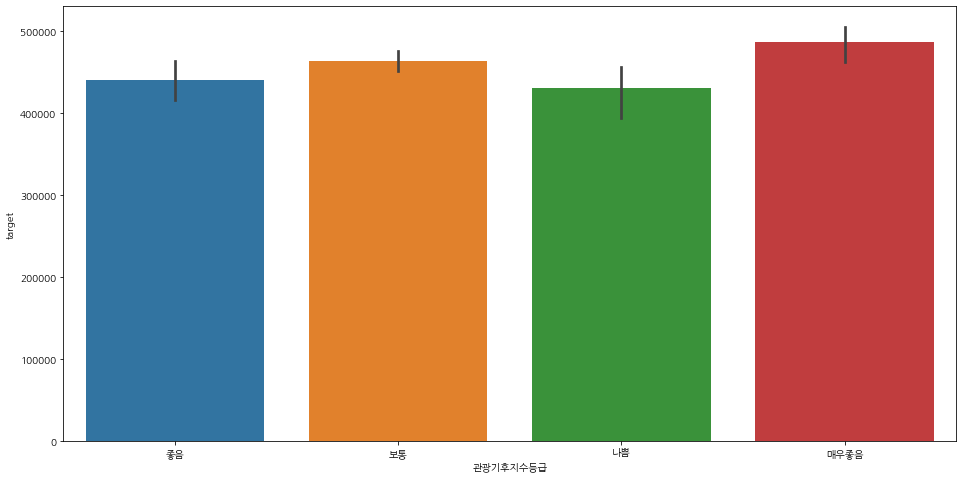

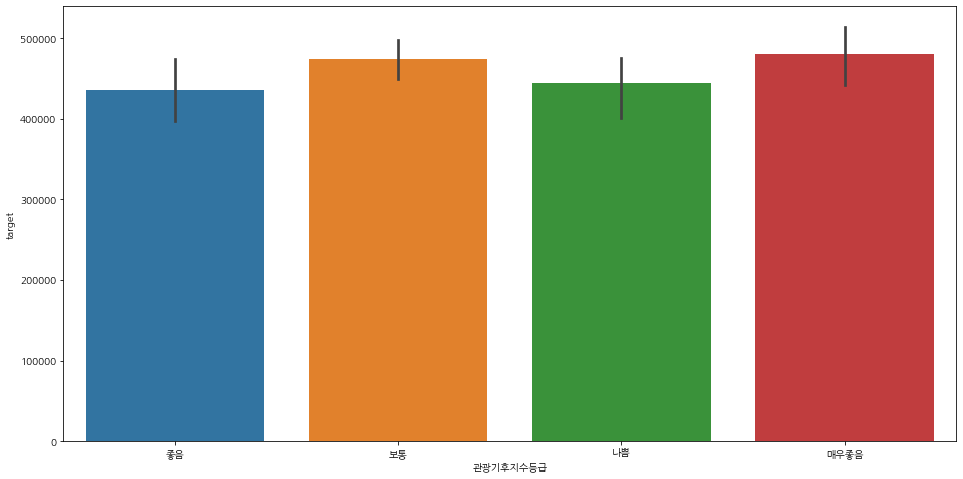

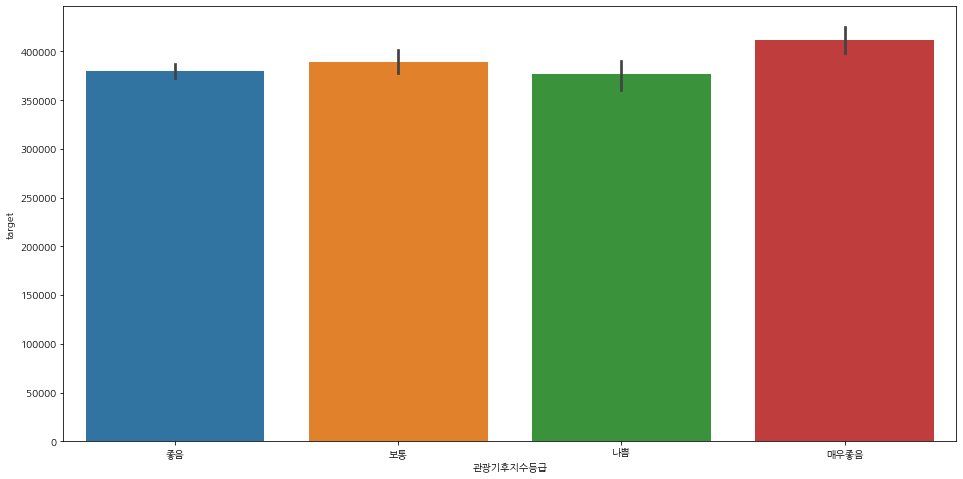

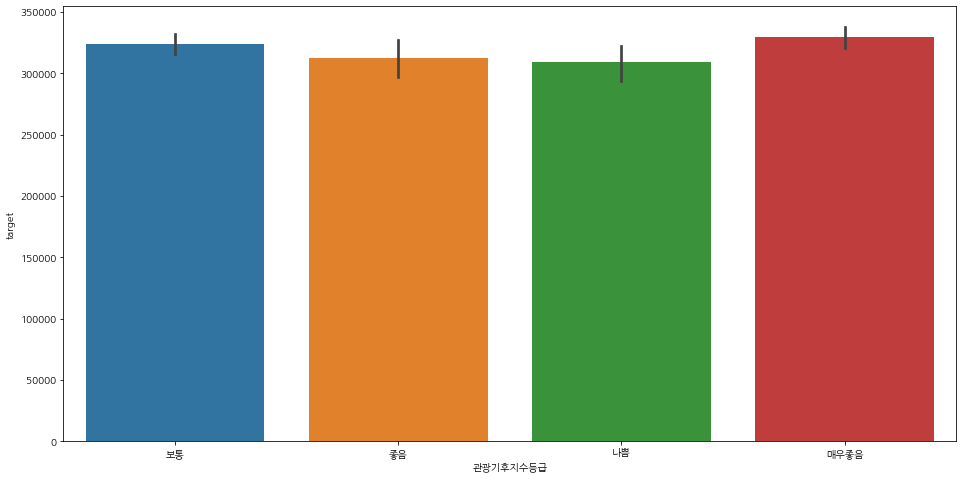

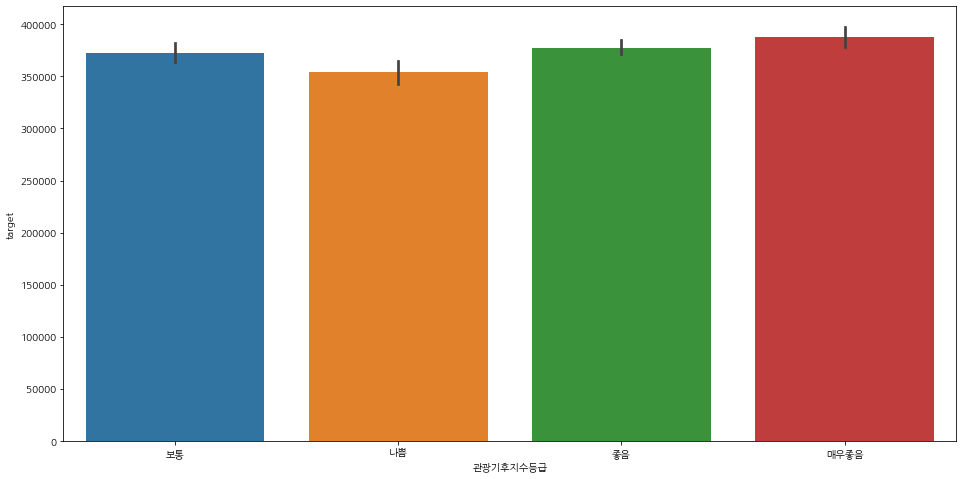

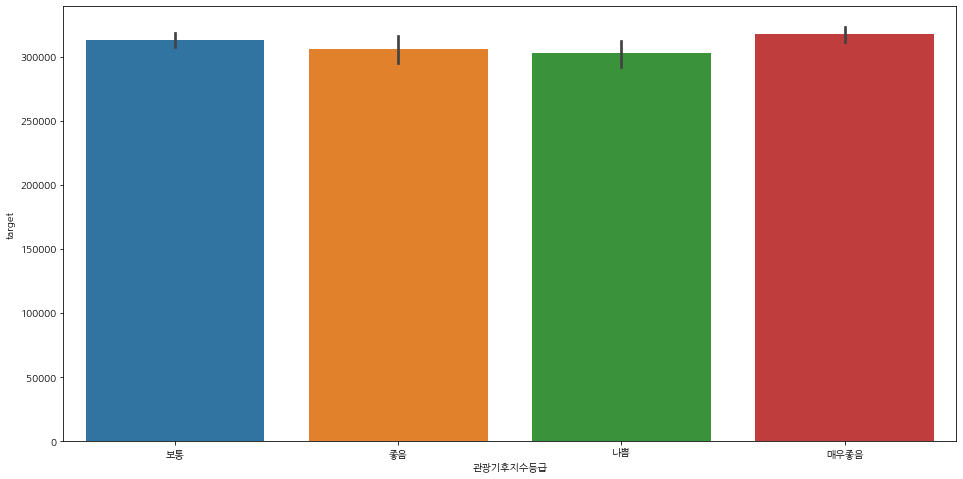

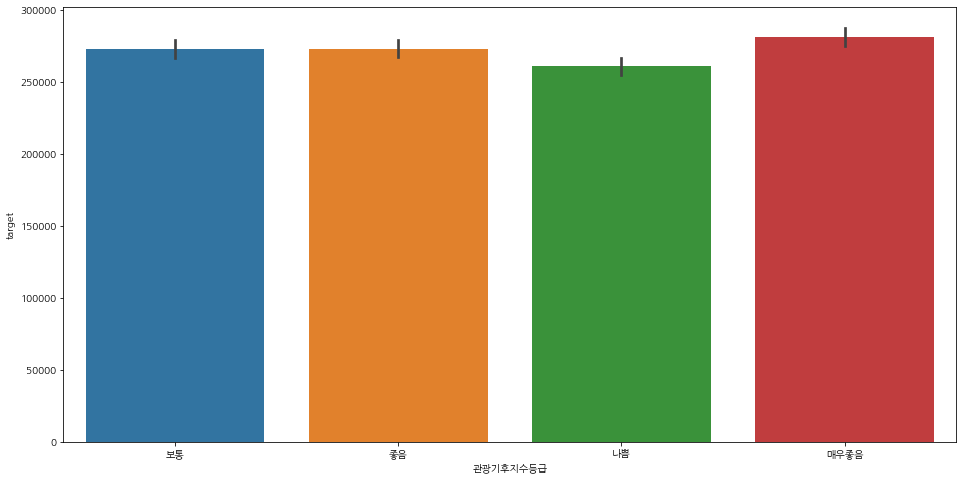

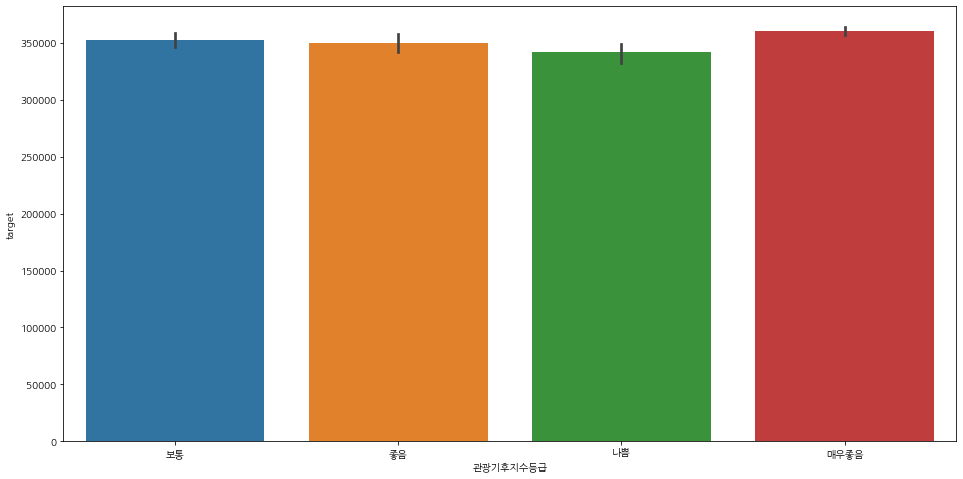

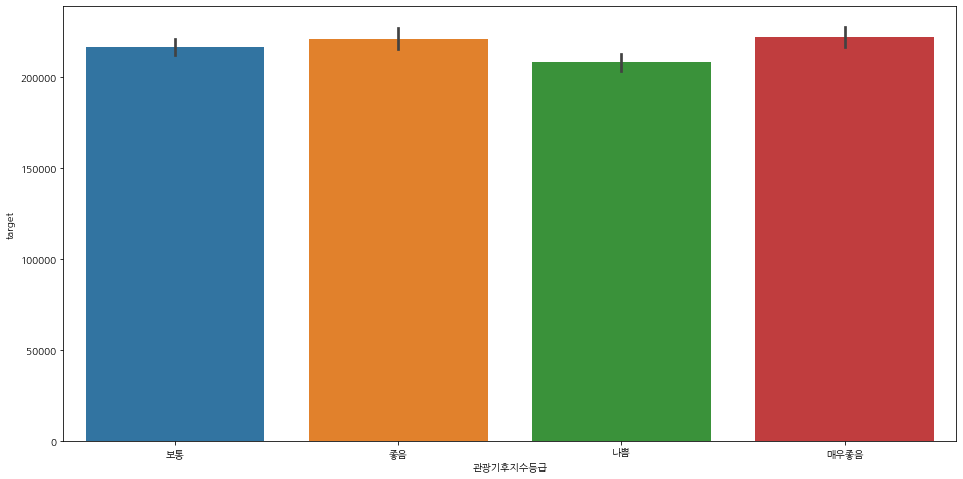

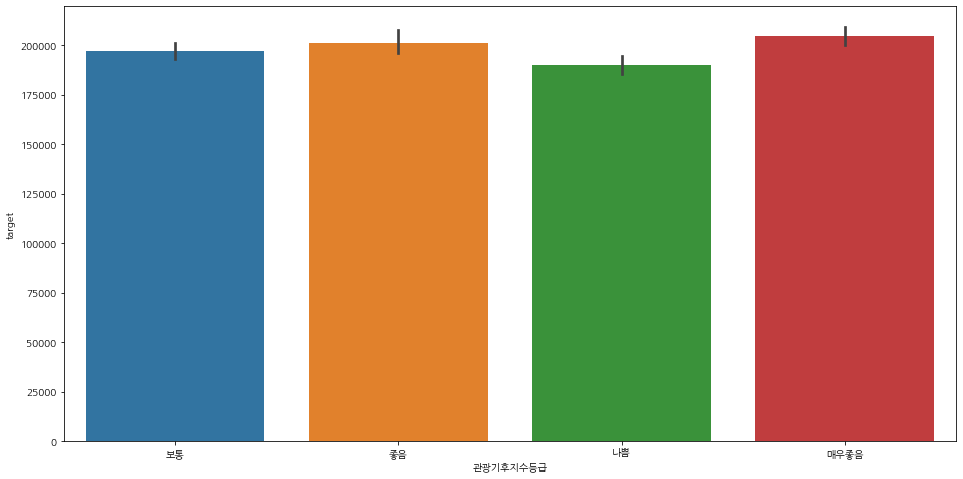

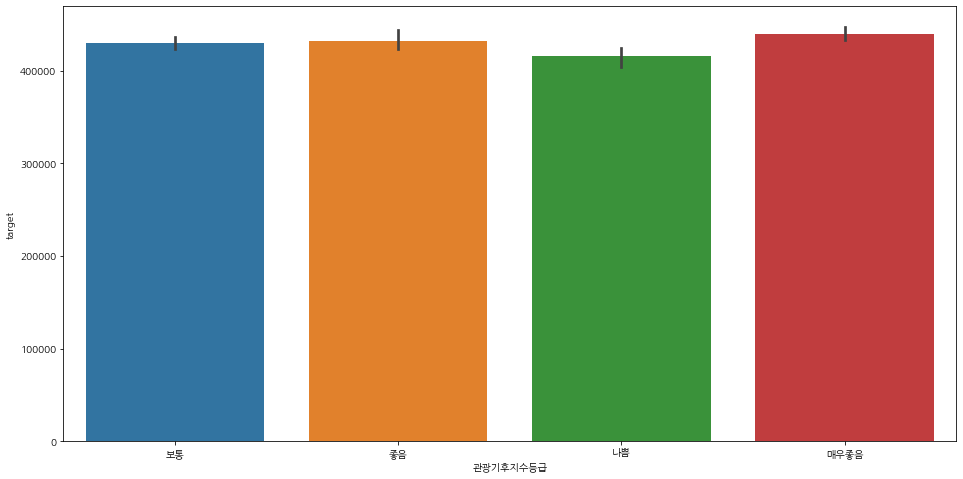

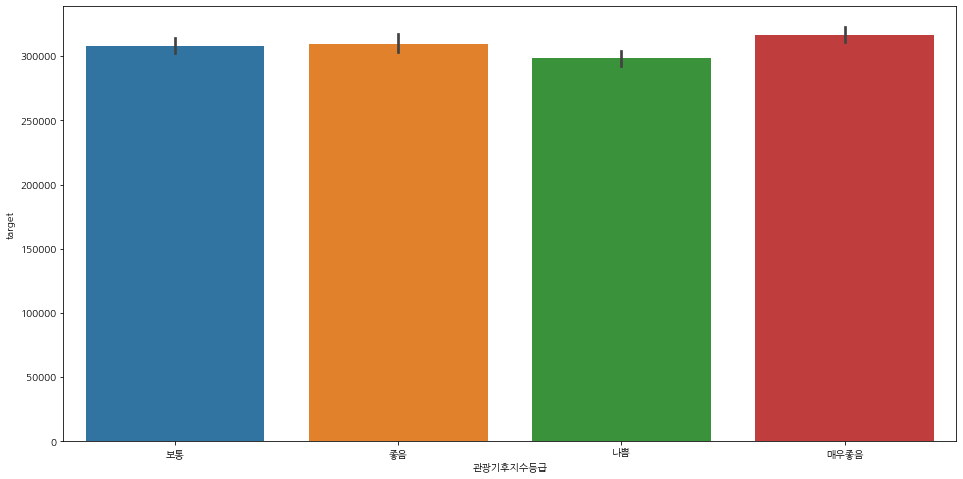

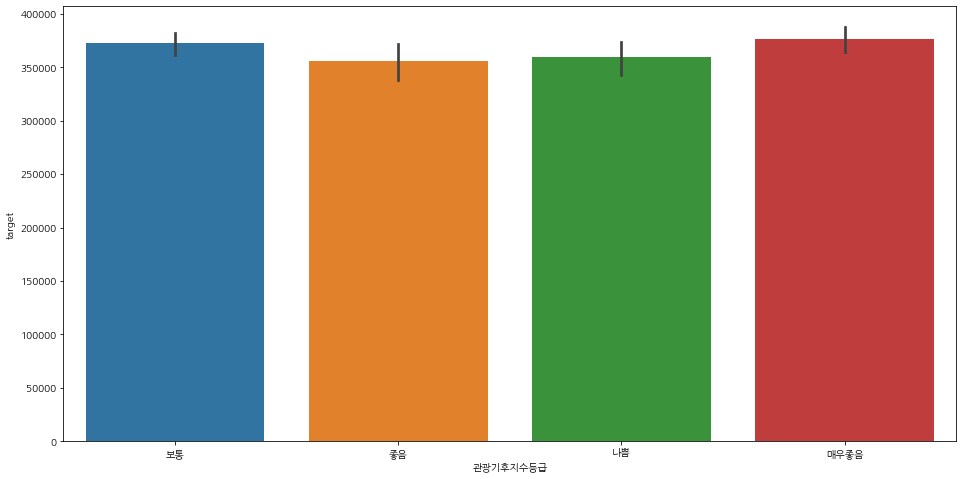

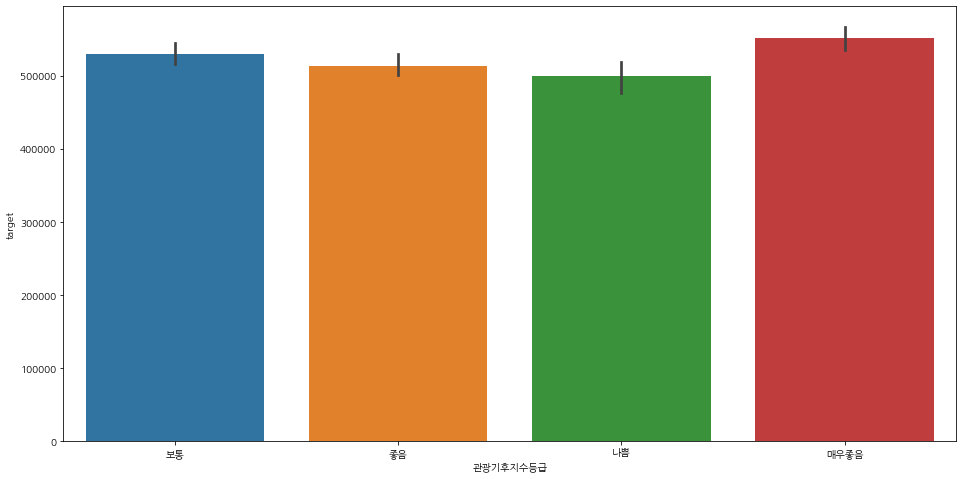

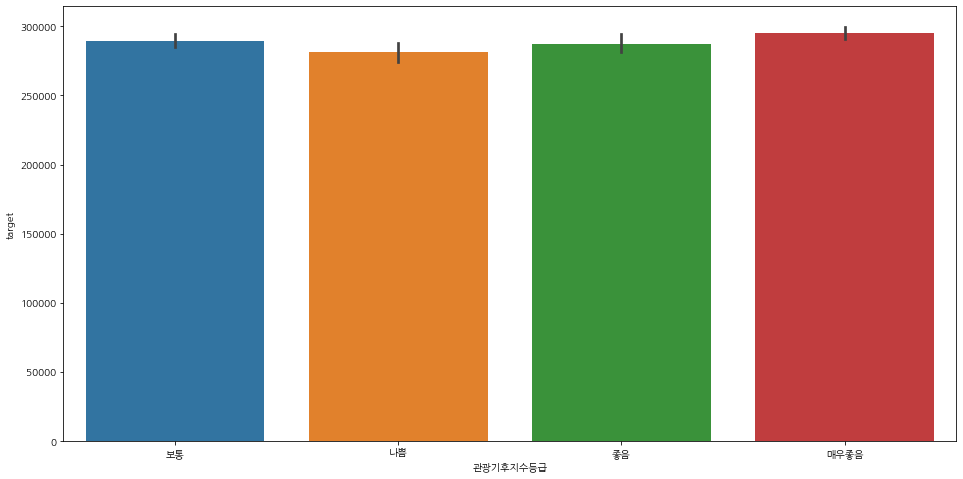

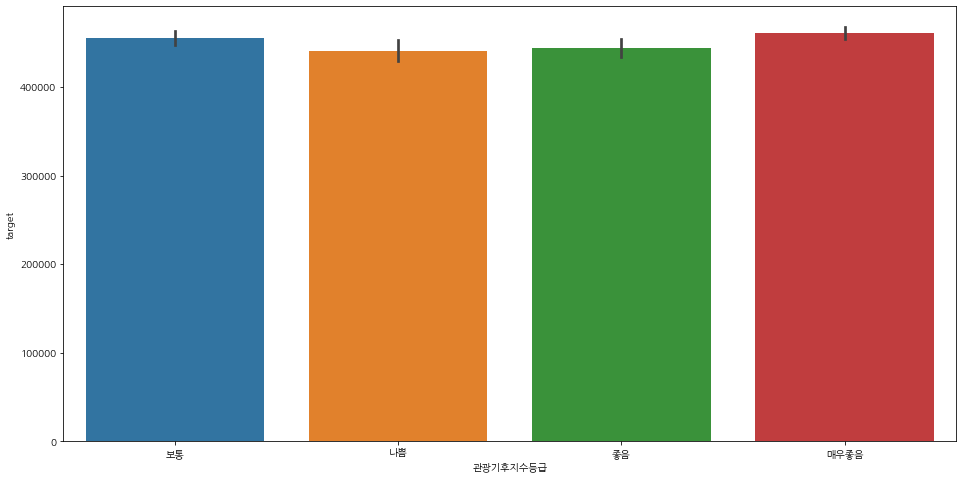

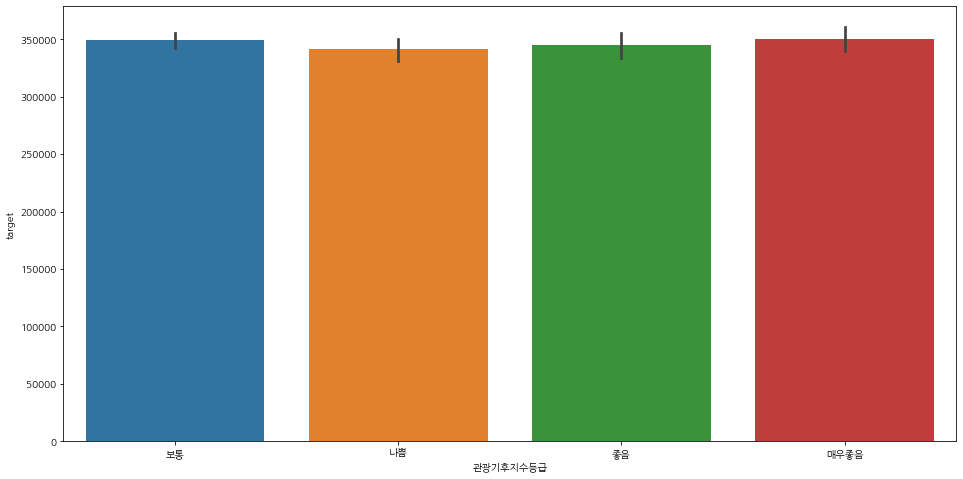

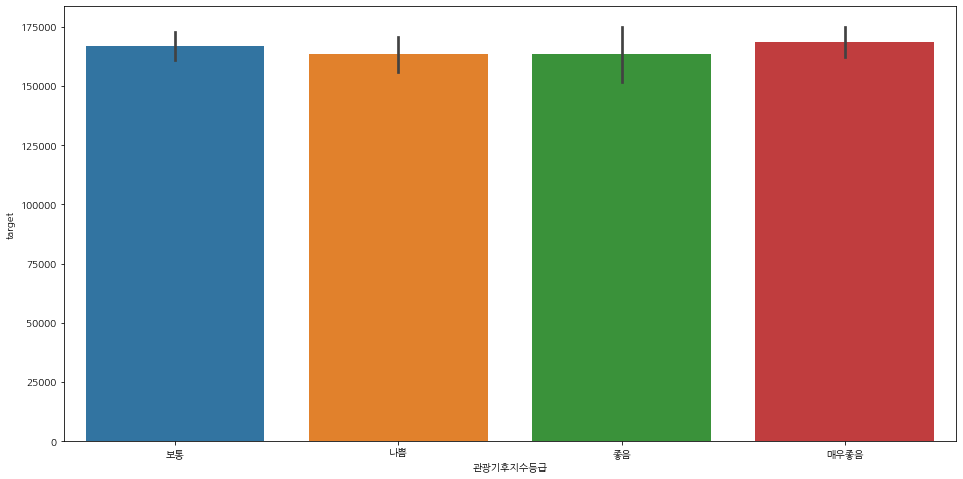

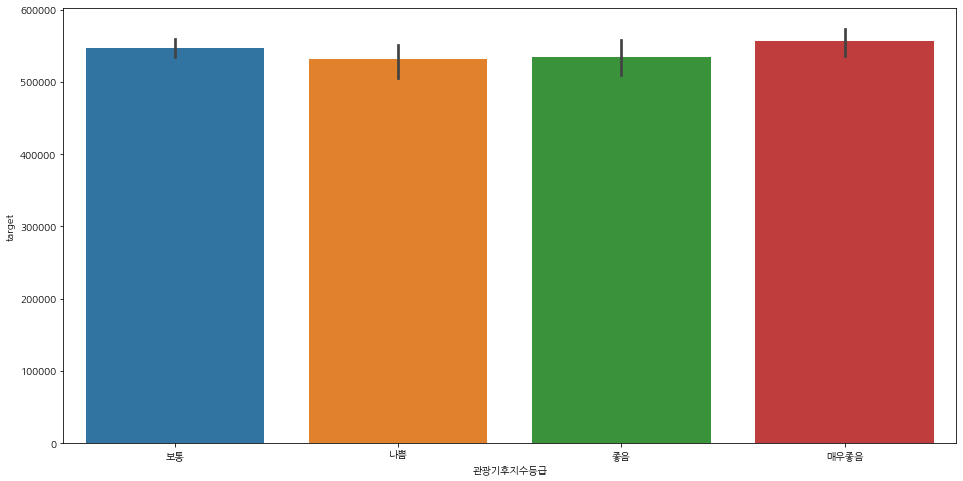

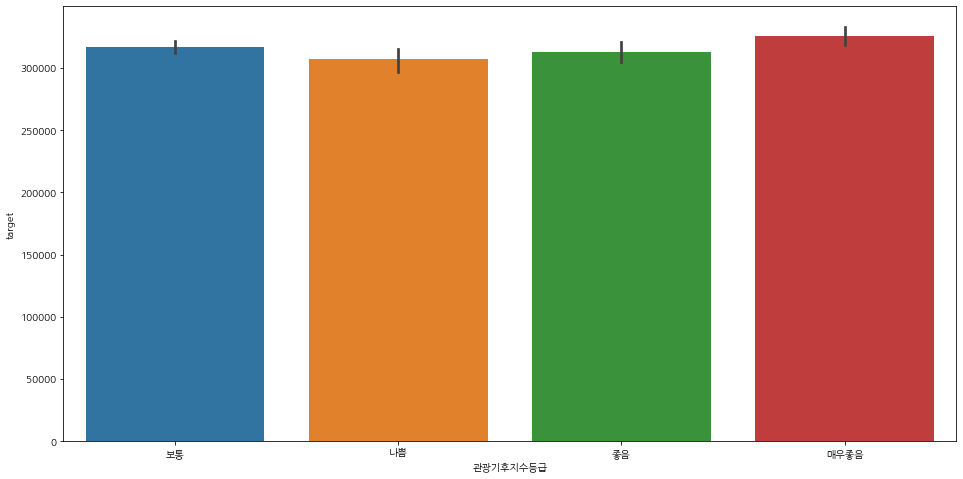

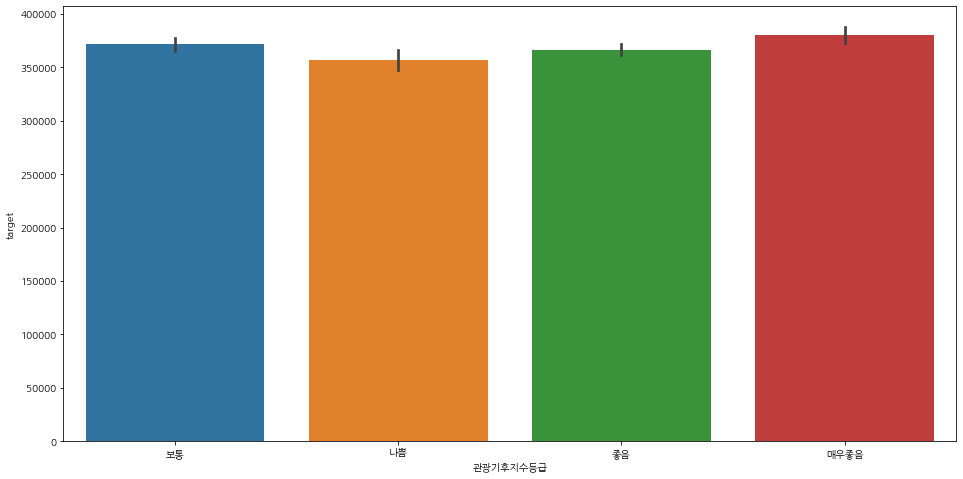

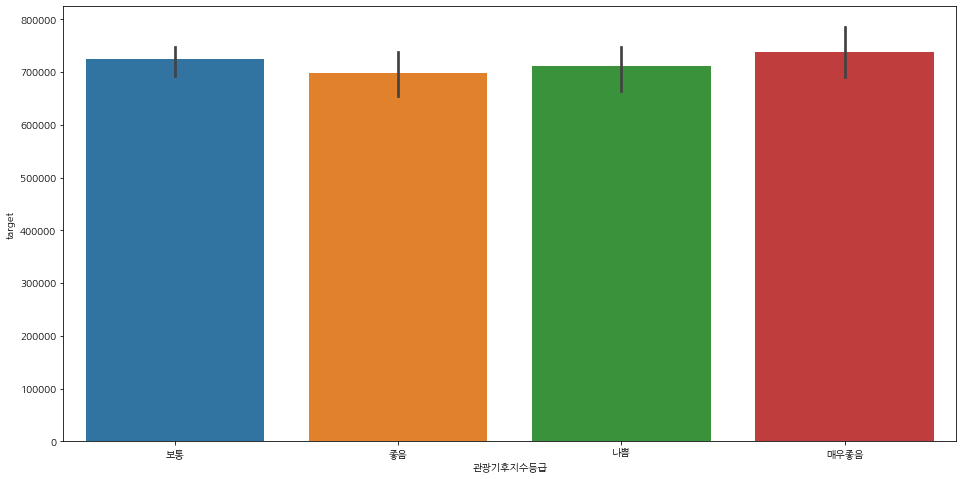

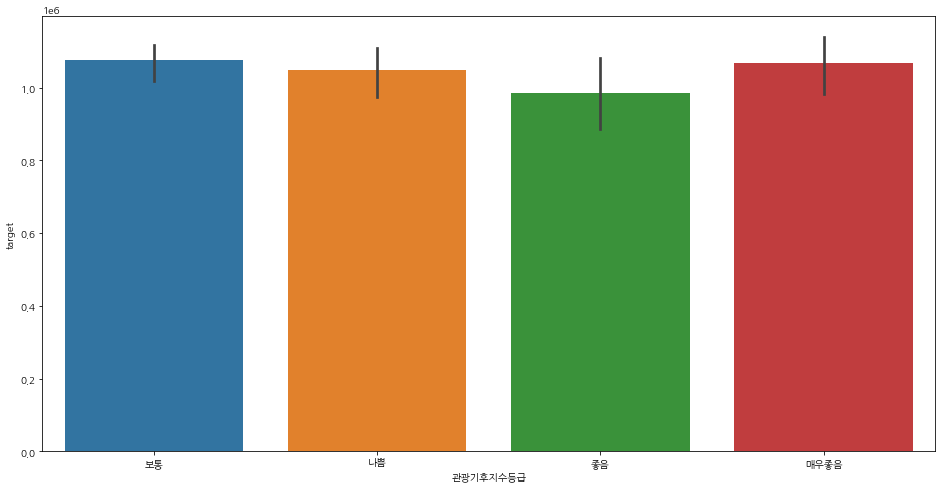

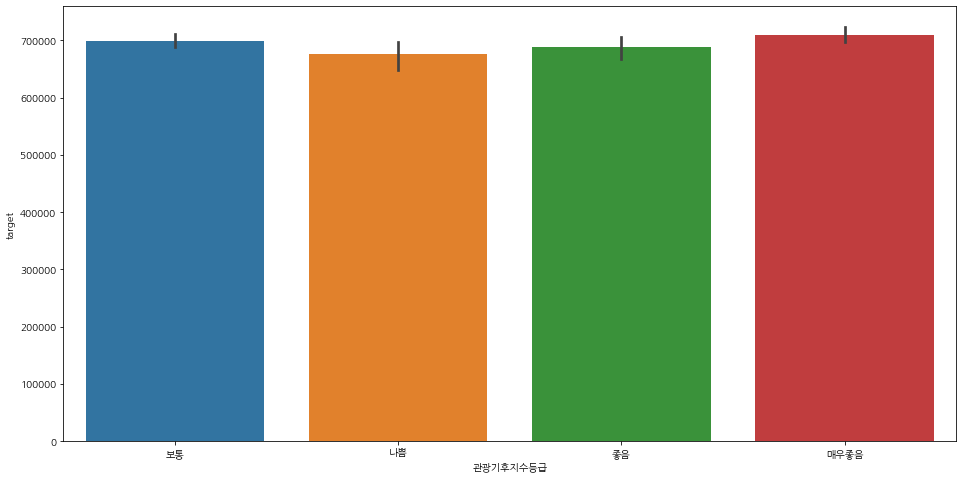

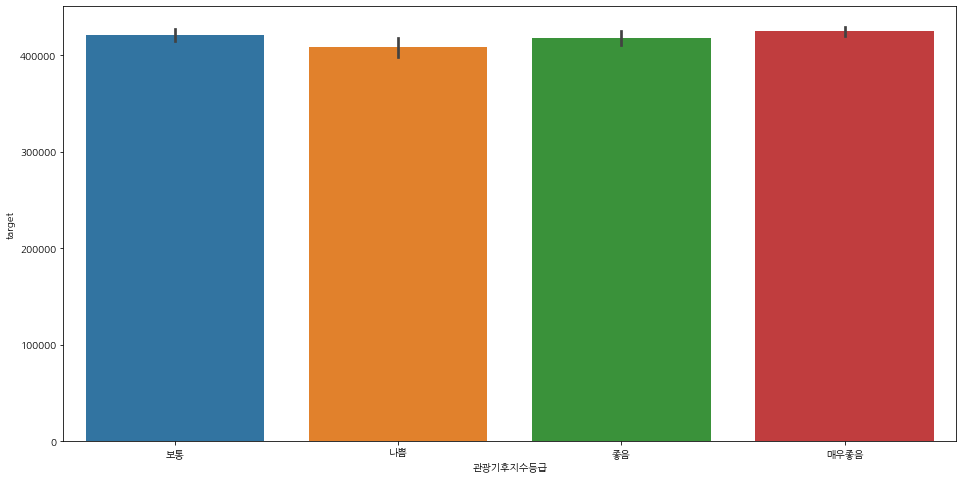

In [ ]:
# 구 별로 관광기후 지수 등급을 확인해보자.
for i in data['구'].unique():
  plt.figure(figsize = (16,8))
  sns.barplot(data = data[data['구'] == i], x  = '관광기후지수등급', y = 'target')
  plt.show()

# 구 마다 기후지수등급에 따른 target변수의 변화가 다르기 때문에 각 구별로 모델을 돌린다면 더 좋은 성능을 낼 것이라고 생각한다.

In [ ]:
data.head()

,weekday,구,target,month,day,weekend,date,관광기후지수,관광기후지수등급
0,0,종로구,436726.5,04,26,0,2021-04-26,0.12,좋음
1,0,종로구,448294.0,04,27,1,2021-04-27,-0.24,보통
2,0,종로구,462843.5,04,28,2,2021-04-28,0.14,좋음
3,0,종로구,460985.0,04,29,3,2021-04-29,0.06,보통
4,0,종로구,472216.5,04,30,4,2021-04-30,-0.33,나쁨


# Modeling

In [ ]:
# 패키지 불러오기
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

한번에_data = pd.get_dummies(data = data, columns = ['구','관광기후지수등급'])
# train과 test를 분리하기
test = 한번에_data[한번에_data['date'] >= '2021-06-10']
train = 한번에_data[한번에_data['date'] < '2021-06-10']

train = train.drop(['date','day'], axis = 1)
test = test.drop(['date','day'], axis = 1)

In [ ]:
X_train = train.drop('target',axis = 1)
y_train = train['target']
X_test = test.drop('target', axis = 1)
y_test = test['target']
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
RMSE=mean_squared_error(y_pred, y_test)**0.5
print(RMSE)

31782.58482486332


In [ ]:
# 구_train

In [ ]:
# 데이터를 train과 test로 나눈다.
구_test = data[data['date'] >= '2021-06-10']
구_train = data[data['date'] < '2021-06-10']

# 관광기후지수등급을 더미화 시켜준다.
구_train = pd.get_dummies(구_train, columns = ['관광기후지수등급'])
구_test = pd.get_dummies(구_test, columns = ['관광기후지수등급'])

# 데이터를 각 구별로 나눠준다.
train_binning = []
test_binning = []

for i in data['구'].unique():
  train_구 = 구_train[구_train['구'] == i]
  test_구 = 구_test[구_test['구'] == i]
  train_구 = train_구.drop(['구','date','day'], axis = 1)
  test_구 = test_구.drop(['구','date','day'], axis = 1)
  train_binning.append(train_구)
  test_binning.append(test_구)

# 각 구별 모델을 돌려서 전체 RMSE를 측정한다.
final_y_pred = []
for i in range(len(train_binning)):
  lr = LinearRegression()
  model = lr.fit(train_binning[i].drop('target', axis = 1), train_binning[i]['target'])
  y_pred = model.predict(test_binning[i].drop('target', axis  = 1))
  final_y_pred.append(y_pred)

y_pred = []
for i in final_y_pred:
  for j in i:
    y_pred.append(j)


RMSE = mean_squared_error(구_test['target'], y_pred)**0.5
print(f'모델을 구별로 돌렸을 때 : {RMSE}')

모델을 구별로 돌렸을 때 : 25209.71899631203


In [ ]:
# 모델을 구 별로 돌렸을 때 더 좋은 결과를 나타내는 것을 알 수 있다.

In [ ]:
import statsmodels.api as sm
train['month'] = train['month'].astype('int')
X = sm.add_constant(train.drop('target', axis = 1))
y = train['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     809.8
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:46:40   Log-Likelihood:                -11903.
No. Observations:                1000   AIC:                         2.387e+04
Df Residuals:                     968   BIC:                         2.403e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.091e+05   8415.016     36.728